# Project: Categorical Feature Encoding Challenge II 

https://www.kaggle.com/c/cat-in-the-dat-ii

## Loading libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix


from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn import metrics
from scipy import stats
from sklearn import linear_model




pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
#Load the data
df = pd.read_csv('/home/jelena/Desktop/DataScience_allwomen/Module3/Project/cat-in-the-dat-ii/train.csv')
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [3]:
df.shape

(600000, 25)

## Preprocessing

In [4]:
#check column names
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [6]:
#check data type
for col in df.columns:
    total = df[col].value_counts(dropna = False)
    percentage = total/df.shape[0]*100
    values = pd.concat([total, percentage], axis=1, keys=['Total_' + col, 'Percentage'])
    values

,Total_id,Percentage
2047,1,0.000167
23713,1,0.000167
56497,1,0.000167
54448,1,0.000167
11439,1,0.000167
...,...,...
9041,1,0.000167
11088,1,0.000167
54095,1,0.000167
56142,1,0.000167


,Total_bin_0,Percentage
0.0,528377,88.062833
1.0,53729,8.954833
NaN,17894,2.982333


,Total_bin_1,Percentage
0.0,474018,79.0030
1.0,107979,17.9965
NaN,18003,3.0005


,Total_bin_2,Percentage
0.0,419845,69.974167
1.0,162225,27.037500
NaN,17930,2.988333


,Total_bin_3,Percentage
F,366212,61.035333
T,215774,35.962333
NaN,18014,3.002333


,Total_bin_4,Percentage
N,312344,52.057333
Y,269609,44.934833
NaN,18047,3.007833


,Total_nom_0,Percentage
Red,323286,53.881000
Blue,205861,34.310167
Green,52601,8.766833
NaN,18252,3.042000


,Total_nom_1,Percentage
Triangle,164190,27.365000
Polygon,152563,25.427167
Trapezoid,119438,19.906333
Circle,104995,17.499167
Square,26503,4.417167
NaN,18156,3.026000
Star,14155,2.359167


,Total_nom_2,Percentage
Hamster,164897,27.482833
Axolotl,152319,25.386500
Lion,119504,19.917333
Dog,104825,17.470833
Cat,26276,4.379333
NaN,18035,3.005833
Snake,14144,2.357333


,Total_nom_3,Percentage
India,164869,27.478167
Costa Rica,151827,25.304500
Russia,119840,19.973333
Finland,104601,17.433500
Canada,26425,4.404167
NaN,18121,3.020167
China,14317,2.386167


,Total_nom_4,Percentage
Theremin,308621,51.436833
Bassoon,196639,32.773167
Oboe,49996,8.332667
Piano,26709,4.451500
NaN,18035,3.005833


,Total_nom_5,Percentage
NaN,17778,2.963000
fc8fc7e56,977,0.162833
360a16627,972,0.162000
7917d446c,961,0.160167
423976253,961,0.160167
...,...,...
7335087fd,5,0.000833
30019ce8a,3,0.000500
b3ad70fcb,1,0.000167
0385d0739,1,0.000167


,Total_nom_6,Percentage
NaN,18131,3.021833
ea8c5e181,805,0.134167
9fa481341,798,0.133000
2b94ada45,792,0.132000
32e9bd1ff,788,0.131333
...,...,...
f7c893813,4,0.000667
322548bed,3,0.000500
b4b8de4b9,2,0.000333
d6ea07c05,2,0.000333


,Total_nom_7,Percentage
NaN,18003,3.000500
4ae48e857,5035,0.839167
c79d2197d,5031,0.838500
86ec768cd,4961,0.826833
a7059911d,4945,0.824167
...,...,...
b39008216,195,0.032500
1828818ab,182,0.030333
75d0e3ef8,157,0.026167
deec583dd,93,0.015500


,Total_nom_8,Percentage
NaN,17755,2.959167
7d7c02c57,5052,0.842000
15f03b1f4,4994,0.832333
5859a8a06,4989,0.831500
d7e75499d,4987,0.831167
...,...,...
8d31d1ab3,207,0.034500
4584d6fcd,174,0.029000
607c26084,149,0.024833
115d9fd8b,105,0.017500


,Total_nom_9,Percentage
NaN,18073,3.012167
8f3276a6e,565,0.094167
65b262989,564,0.094000
c5361037c,560,0.093333
9bc905a9d,558,0.093000
...,...,...
432e3fc6a,2,0.000333
1538d82e9,2,0.000333
47a0cd9da,2,0.000333
d1e6704ed,1,0.000167


,Total_ord_0,Percentage
1.0,227917,37.986167
3.0,197798,32.966333
2.0,155997,25.999500
NaN,18288,3.048000


,Total_ord_1,Percentage
Novice,160597,26.766167
Expert,139677,23.279500
Contributor,109821,18.303500
Grandmaster,95866,15.977667
Master,75998,12.666333
NaN,18041,3.006833


,Total_ord_2,Percentage
Freezing,142726,23.787667
Warm,124239,20.706500
Cold,97822,16.303667
Boiling Hot,84790,14.131667
Hot,67508,11.251333
Lava Hot,64840,10.806667
NaN,18075,3.012500


,Total_ord_3,Percentage
n,70982,11.830333
a,65321,10.886833
m,57980,9.663333
c,56675,9.445833
h,55744,9.290667
o,45464,7.577333
b,44795,7.465833
e,38904,6.484000
k,38718,6.453000
i,34763,5.793833


,Total_ord_4,Percentage
N,39978,6.663000
P,37890,6.315000
Y,36657,6.109500
A,36633,6.105500
R,33045,5.507500
U,32897,5.482833
M,32504,5.417333
X,32347,5.391167
C,32112,5.352000
H,31189,5.198167


,Total_ord_5,Percentage
NaN,17713,2.952167
Fl,10562,1.760333
DN,9527,1.587833
Sz,8654,1.442333
RV,5648,0.941333
...,...,...
vw,189,0.031500
gV,124,0.020667
vQ,120,0.020000
eA,91,0.015167


,Total_day,Percentage
3.0,113835,18.972500
5.0,110464,18.410667
6.0,97432,16.238667
7.0,86435,14.405833
1.0,84724,14.120667
2.0,65495,10.915833
4.0,23663,3.943833
NaN,17952,2.992000


,Total_month,Percentage
8.0,79245,13.207500
3.0,70160,11.693333
5.0,68906,11.484333
12.0,68340,11.390000
6.0,60478,10.079667
7.0,53480,8.913333
1.0,52154,8.692333
11.0,51165,8.527500
2.0,40700,6.783333
9.0,20620,3.436667


,Total_target,Percentage
0,487677,81.2795
1,112323,18.7205


In [7]:
import re
#classify variables based on their data and meaning
binary = []
categorical_nominal = []
categorical_ordinal = []
for col in df.columns:
    if col == 'id':
        categorical_nominal.append(col) #is it categorical???
    if re.match(r'bin', col):
        binary.append(col)
    if re.match(r'ord', col):
        categorical_ordinal.append(col)
    if re.match(r'nom', col):
        categorical_nominal.append(col)
    if col == 'target':
        binary.append(col)
print('Binary: {}'.format(binary) + '\n' + 'Categorical_ordinal: {}'.format(categorical_ordinal) + '\n' + 
      'Categorical_nominal: {}'.format(categorical_nominal))

Binary: ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'target']
Categorical_ordinal: ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']
Categorical_nominal: ['id', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']


**Column meaning and value distribution**<br/>

1. Binary features

bin_0 - binaryzero_0 - contains mostly zero values (0 - 88%, 1 - 9%)<br/>
bin_1 - binaryzero_1 - contains mostly zero values (0 - 79%, 1 - 18%)<br/>
bin_2 - binaryzero_2 - contains mostly sero values (0 - 70%, 1 - 27%)<br/>
bin_3 - F_T - contains mostly F (F - 61%, T - 36%)<br/>
bin_4 - N_Y - contains more N than Y (N - 52%, Y - 45%)<br/>
target - contains mostly zero values (0 - 81%, 1 - 18%)<br/>

2. Nominal features

nom_0 - colors - Red, Blue, Greed (red - 54%, blue - 34%)<br/>
nom_1 - shapes (Triangle, Polygon, Trapezoid, Circle, Square, Star)<br/>
nom_2 - animal (Hamster, Axolotl, Lion, Dog, Cat, Snake)<br/>
nom_3 - countries (India, Costa Rica, Russia, Finland, Canada, China)<br/>
nom_4 - instruments (Theremin, Basson, Oboe, Piano)<br/>
nom_5 - random_0 (biggest 'category' nulls)<br/>
nom_6 - random_1 (biggest 'category' nulls)<br/>
nom_7 - random_2 (biggest 'category' nulls)<br/>
nom_8 - random_3 (biggest 'category' nulls)<br/>
nom_9 - random_4 (biggest 'category' nulls)<br/>

3. Ordinal features

ord_0 - one_two_three (1 - 38%, 3 - 32%, 2 - 26%)<br/>
ord_1 - competitors (novice, expert, contributor, grandmaster, master)<br/>
ord_2 - temperature (freezing, warm, col, boiling hot, hot, lava hot)<br/>
ord_3 - lover_case_letters (15)<br/>
ord_4 - upper_case_letter (26)<br/>
ord_5 - letter_combination (190)<br/>

4. Cyclical features

day <br/>
month<br/>

In [4]:
#copy dataframe
data = df.copy()

In [5]:
#correct the column names
new_column=('id','binaryzero_0', 'binaryzero_1', 'binaryzero_2', 'F_T', 'N_Y', 'colors', 'shapes', 'animals', 
           'countries', 'instruments', 'random_0', 'random_1', 'random_2', 'random_3', 'random_4',
           'one_two_three', 'competitions', 'temperature', 'lower_case_letters', 'upper_case_letters', 'letter_combination')
data.rename(columns=dict(zip(data.columns, new_column)),inplace=True)
data.head()

,id,binaryzero_0,binaryzero_1,binaryzero_2,F_T,N_Y,colors,shapes,animals,countries,instruments,random_0,random_1,random_2,random_3,random_4,one_two_three,competitions,temperature,lower_case_letters,upper_case_letters,letter_combination,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  600000 non-null  int64  
 1   binaryzero_0        582106 non-null  float64
 2   binaryzero_1        581997 non-null  float64
 3   binaryzero_2        582070 non-null  float64
 4   F_T                 581986 non-null  object 
 5   N_Y                 581953 non-null  object 
 6   colors              581748 non-null  object 
 7   shapes              581844 non-null  object 
 8   animals             581965 non-null  object 
 9   countries           581879 non-null  object 
 10  instruments         581965 non-null  object 
 11  random_0            582222 non-null  object 
 12  random_1            581869 non-null  object 
 13  random_2            581997 non-null  object 
 14  random_3            582245 non-null  object 
 15  random_4            581927 non-nul

### Nulls and duplicates

In [6]:
#nulls
total = data.isnull().sum().sort_values(ascending=False)
percentage = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.sort_values(by=['Percentage'], inplace=True)
missing_data.style

,Total,Percentage
id,0,0.000000
target,0,0.000000
letter_combination,17713,2.952167
random_3,17755,2.959167
random_0,17778,2.963000
binaryzero_0,17894,2.982333
lower_case_letters,17916,2.986000
binaryzero_2,17930,2.988333
upper_case_letters,17930,2.988333
day,17952,2.992000


*All columns except id and target are missing between 17000 to 18000 of values. Considering amount of data that is around 2%-3% of values.*

In [12]:
#total amount of nulls in the dataset
data.isnull().sum().sum()

414130

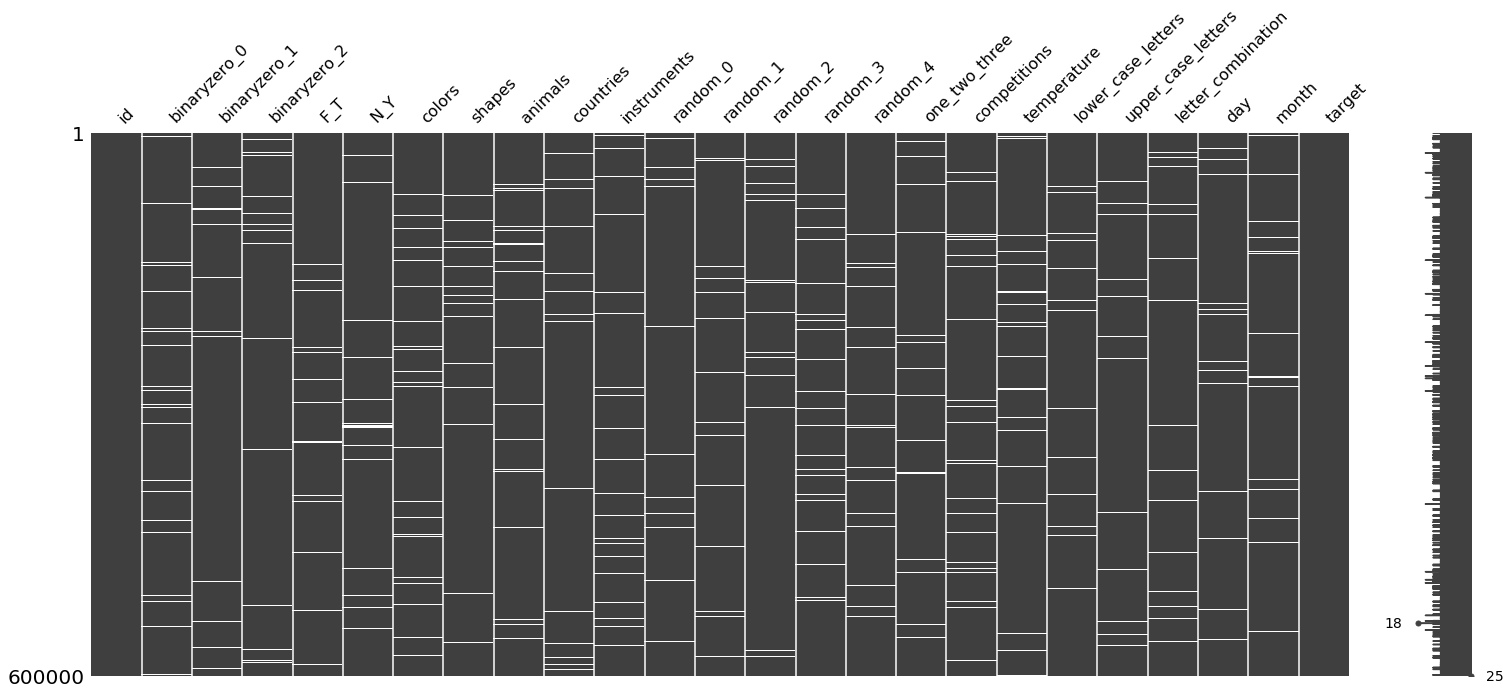

In [13]:
#check the distribution of the missing values
import missingno as msno
_ = msno.matrix(data)

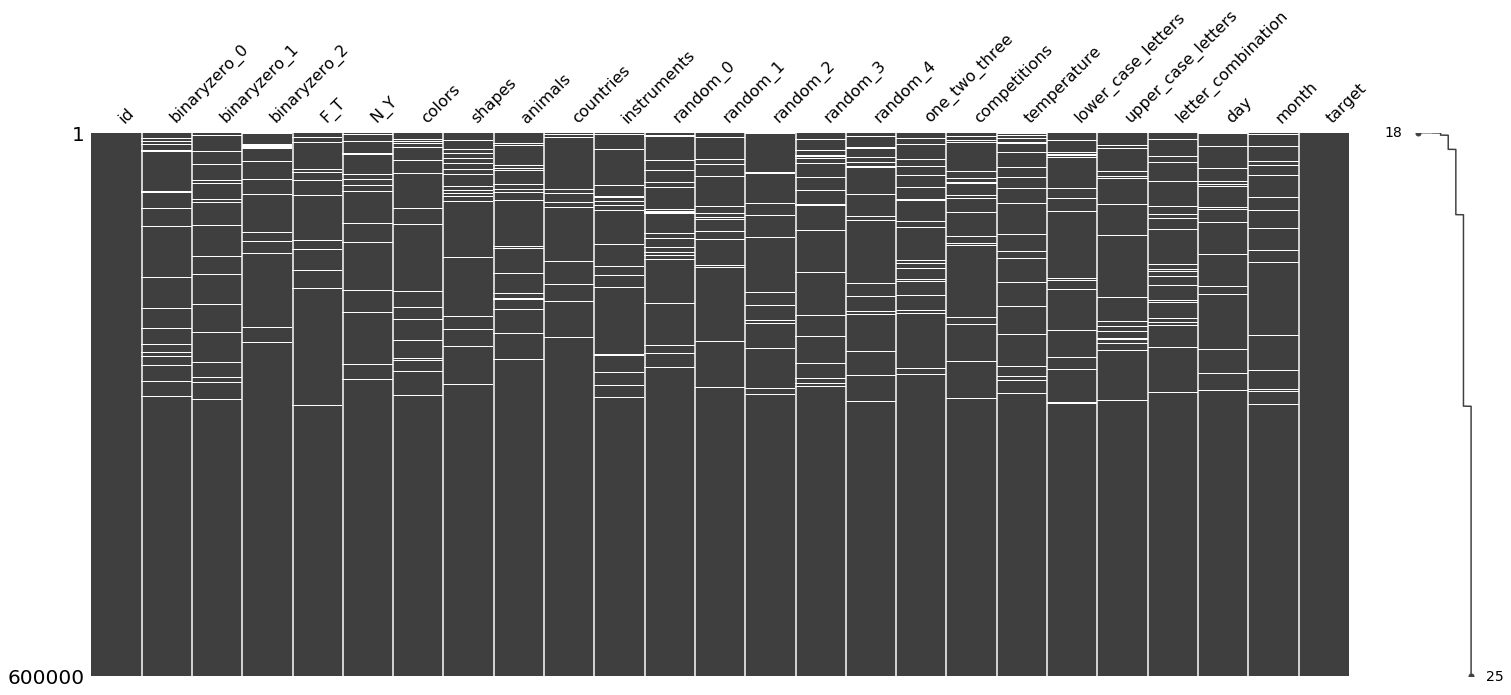

In [14]:
_ = msno.matrix(data, sort='ascending' )

*Missing values are spreaded radnomly in the different features. There is no entry that is missing values in all categories (not taking into consideration id and target variable).*

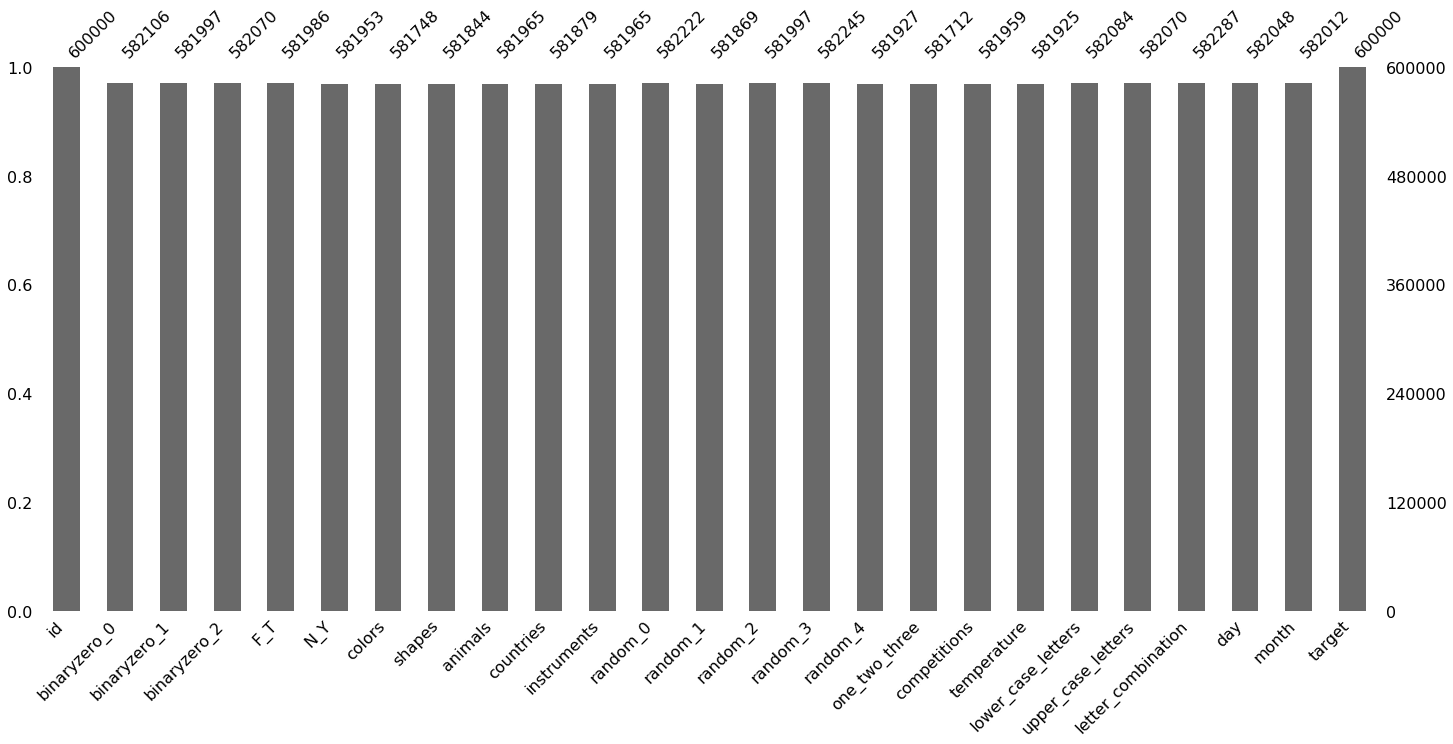

In [15]:
  _ = msno.bar(data)

In [9]:
#duplicates
data.duplicated().sum()

#check duplicates without taget column
data_no_target = data.drop(columns=['target', 'id'])
data_no_target.duplicated().sum()

0

0

*There are no duplicates in the dataframe.*

## Exploratory data analysis

In [14]:
#separate target variable
features = data.drop(columns=['target', 'id'])
target = data['target']

### Target variable

In [15]:
#distribution of values
total = target.value_counts()
percentage = round((total/target.shape[0]*100),2)
values = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
values

,Total,Percentage
0,487677,81.28
1,112323,18.72


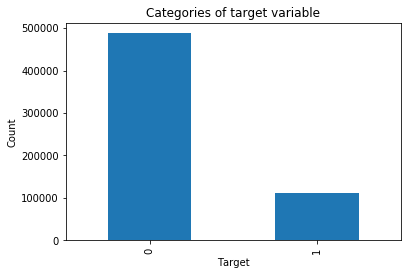

In [16]:
#bar plot
_ = target.value_counts().plot(kind='bar')
_ = plt.title('Categories of target variable')
_ = plt.xlabel('Target')
_ = plt.ylabel('Count')

*Distribution of values in target variable is disproportional. There is 81% of zeros and 18% of 1. This could cause potential problems during training ML models because models would not be able to correcly learn patterns when dependant variable is 1.*

### Distribution of values

In [17]:
#check number of unique values in features
for col in features.columns:
    unique = features[col].nunique()
    print(col + ': ' + str(unique))


binaryzero_0: 2
binaryzero_1: 2
binaryzero_2: 2
F_T: 2
N_Y: 2
colors: 3
shapes: 6
animals: 6
countries: 6
instruments: 4
random_0: 1220
random_1: 1519
random_2: 222
random_3: 222
random_4: 2218
one_two_three: 3
competitions: 5
temperature: 6
lower_case_letters: 15
upper_case_letters: 26
letter_combination: 190
day: 7
month: 12


*Most of the features have less than 10 categories. There are two features with 15 and 26 categories, and six features with more than 100 and 1000 categories. These features with more than 100 and 1000 categories are considered as features with high cardinality.*

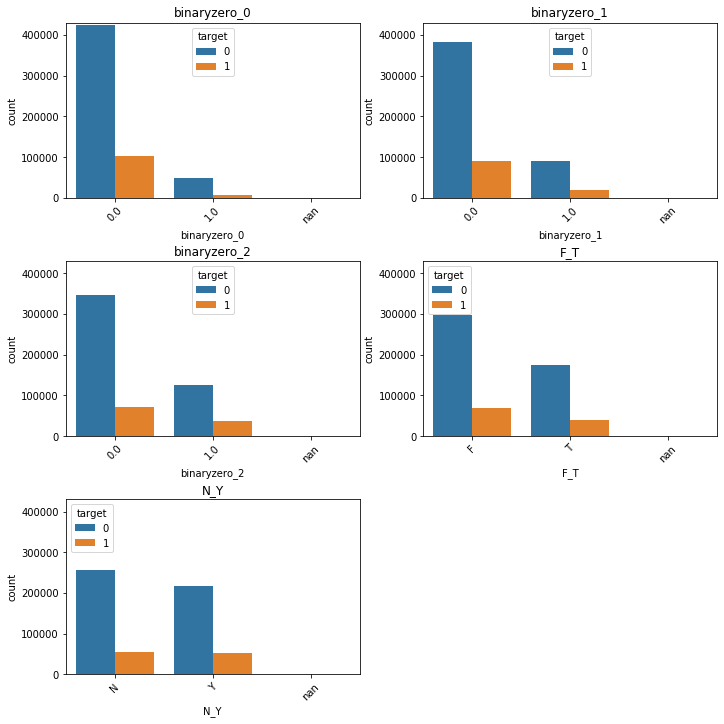

In [18]:
#category distribution splitted by target for binary features
bin_col = ['binaryzero_0', 'binaryzero_1', 'binaryzero_2', 'F_T', 'N_Y']
_=plt.figure(figsize=(10,10))
n=1
for col in bin_col:
    _ = plt.subplot(3,2,n)
    _ = sns.countplot(col, hue='target', data= data, order = data[col].value_counts(dropna=False).index)
    _ = plt.title(col)
    _ = plt.xticks(rotation=45)
    _ = plt.ylim(0,430000)
    _ = plt.tight_layout(pad=0.5)
    n= n+1

In [19]:
#check values
for col in bin_col:
    cat_count = pd.crosstab(data.target, data[col], dropna=False)
    cat_count

binaryzero_0,0.0,1.0
target,,
0,425516,47638
1,102861,6091


binaryzero_1,0.0,1.0
target,,
0,383689,89377
1,90329,18602


binaryzero_2,0.0,1.0
target,,
0,347997,125089
1,71848,37136


F_T,F,T
target,,
0,297814,175237
1,68398,40537


N_Y,N,Y
target,,
0,256049,216953
1,56295,52656


*Looking at the binary features from "binaryzero_0" to "N_Y", it seems that both target 0 and target 1, the amount of first category is decreasing and the second category is increasing, and they become very close.*

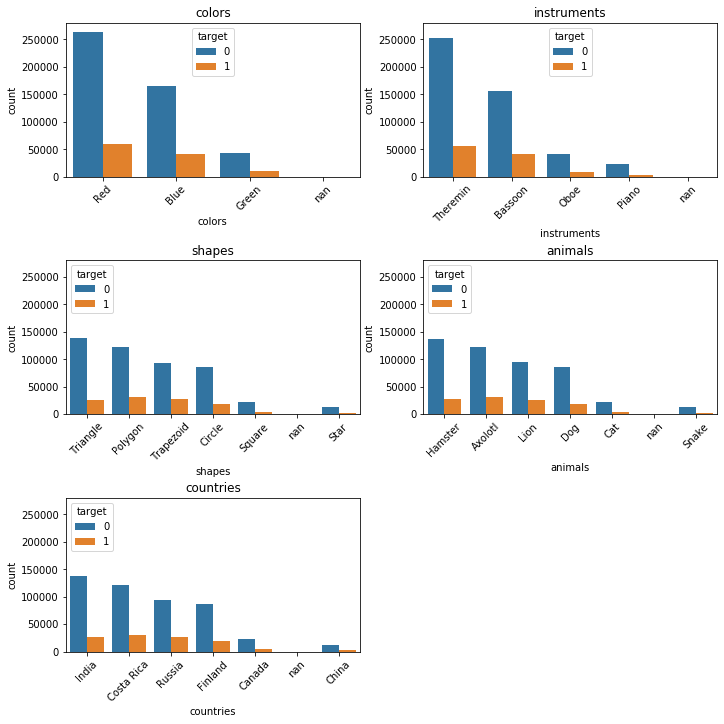

In [20]:
#category distribution splitted by target for nominal features with less than 100 categories
nom_col = ['colors',  'instruments', 'shapes', 'animals', 'countries']
_=plt.figure(figsize=(10,10))
n=1
for col in nom_col:
    _ = plt.subplot(3,2,n)
    _ = sns.countplot(col, hue='target', data= data, order = data[col].value_counts(dropna=False).index)
    _ = plt.title(col)
    _ = plt.xticks(rotation=45)
    _ = plt.ylim(0, 280000)
    _ = plt.tight_layout(pad=0.5)
    n= n+1

In [21]:
#check values
for col in nom_col:
    cat_count = pd.crosstab(data.target, data[col], dropna=False)
    cat_count

colors,Blue,Green,Red
target,,,
0,165561,43143,264103
1,40300,9458,59183


instruments,Bassoon,Oboe,Piano,Theremin
target,,,,
0,155861,40965,22961,253201
1,40778,9031,3748,55420


shapes,Circle,Polygon,Square,Star,Trapezoid,Triangle
target,,,,,,
0,86128,121224,22314,12312,92509,138353
1,18867,31339,4189,1843,26929,25837


animals,Axolotl,Cat,Dog,Hamster,Lion,Snake
target,,,,,,
0,121687,21889,85759,137192,94428,12052
1,30632,4387,19066,27705,25076,2092


countries,Canada,China,Costa Rica,Finland,India,Russia
target,,,,,,
0,22201,12343,121031,85883,137935,93531
1,4224,1974,30796,18718,26934,26309


*Looking at the nominal low cardinality features, first it could be noticed expansion of categories from 3 to 4 to 6 categories. Distribution of categories for all three features with 6 categories, when target is 0 and 1, looks similar. Even the count of categies in different features is similar. For "colors" and "instruments" order of categories when target is 0 and 1 is same. For rest of the columns order of categoried for target 1 and 0 is different, but features follow similar distribution. Only in "shapes" column third category for taget 1 had greater count than first category.*

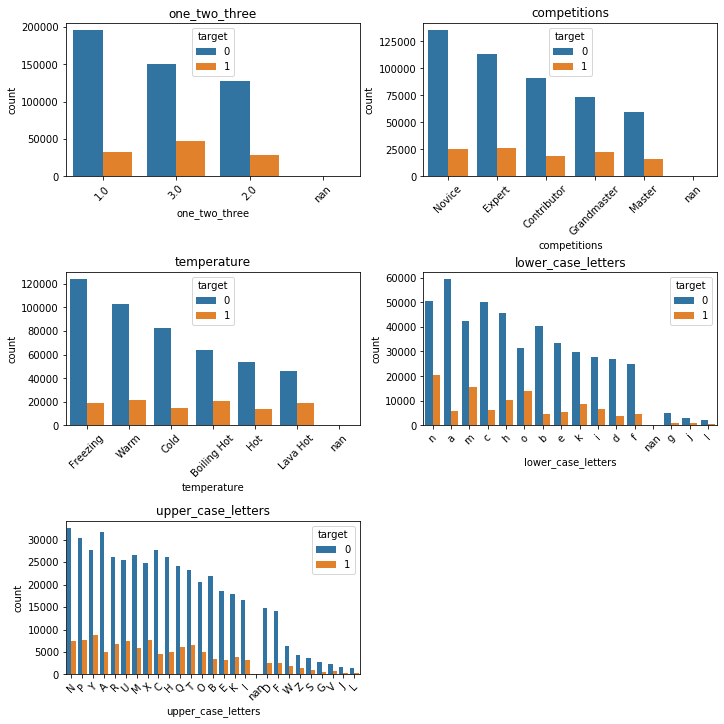

In [22]:
#category distribution splitted by target for ordinal features with less than 100 categories
ord_col = ['one_two_three', 'competitions', 'temperature', 'lower_case_letters', 'upper_case_letters']
_=plt.figure(figsize=(10,10))
n=1
for col in ord_col:
    _ = plt.subplot(3,2,n)
    _ = sns.countplot(col, hue='target', data= data, order = data[col].value_counts(dropna=False).index)
    _ = plt.title(col)
    _ = plt.xticks(rotation=45)
    #_ = plt.ylim(0, 200000)
    _ = plt.tight_layout(pad=0.5)
    n= n+1

*Again for ordinal features it could be noticed that features follow similar distribution for both target 0 and target 1, with expansion in the number of categries.*

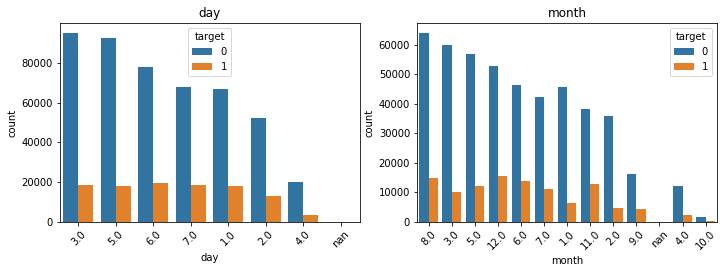

In [23]:
#category distribution splitted by target for ordinal features with less than 100 categories
cyclical_col = ['day', 'month']
_=plt.figure(figsize=(10,10))
n=1
for col in cyclical_col:
    _ = plt.subplot(3,2,n)
    _ = sns.countplot(col, hue='target', data= data, order = data[col].value_counts(dropna=False).index)
    _ = plt.title(col)
    _ = plt.xticks(rotation=45)
    #_ = plt.ylim(0, 200000)
    _ = plt.tight_layout(pad=0.5)
    n= n+1

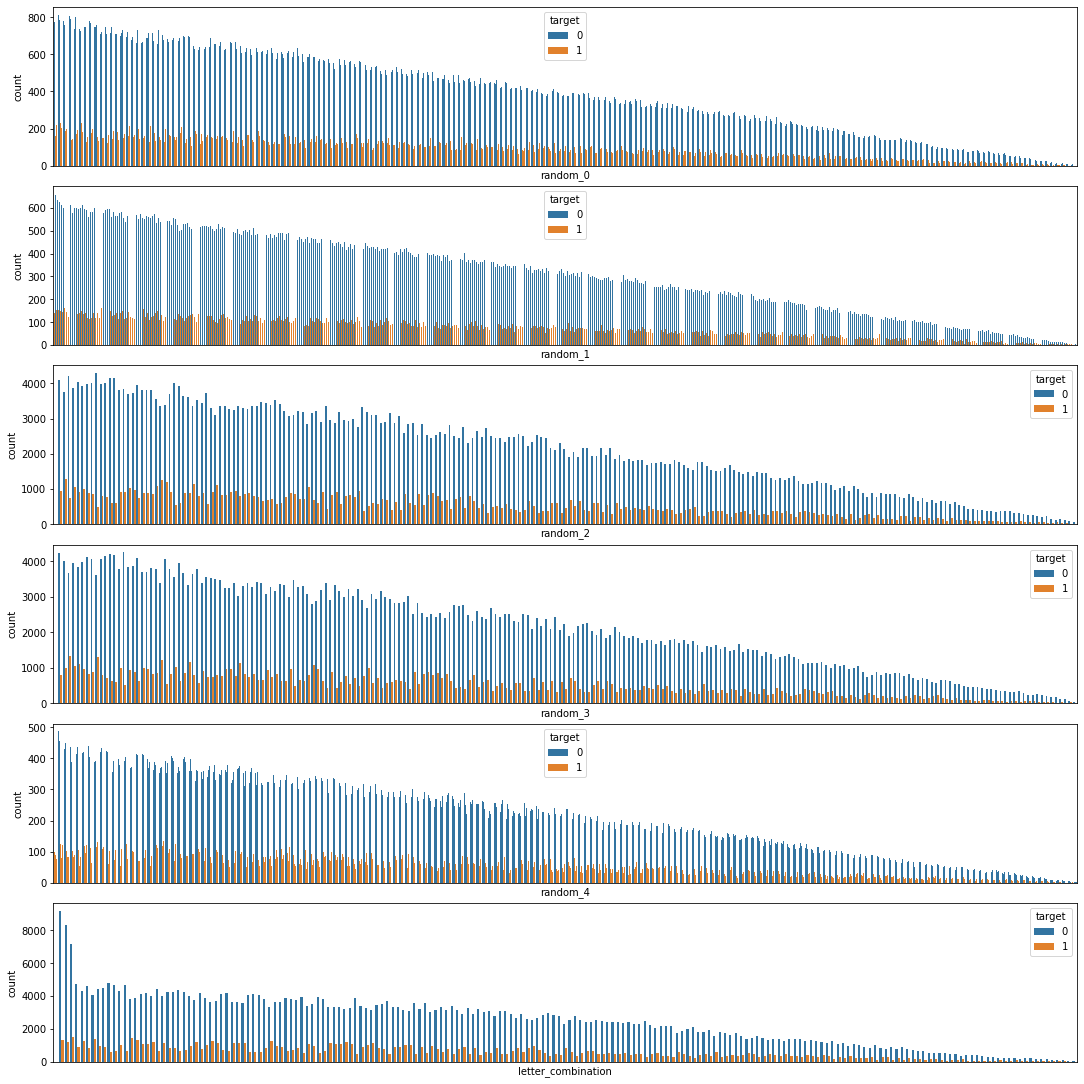

In [27]:
#category distribution splitted by target for features with more than 100 categories
_=plt.figure(figsize=(15,15))
n=1
for col in data.columns:
    if col == 'id':
        continue
    if data[col].nunique() > 100:
        _ = plt.subplot(6,1,n)
        _ = sns.countplot(col, hue='target', data= data, order = data[col].value_counts(dropna=False).index)
        _ = plt.xticks([])
        _ = plt.tight_layout(pad=0.5)
        n= n+1

- Radnom_1 - values are divided in alternately groups that are for most part overlapping when target is 0 or 1.<br/>
- Random_2 - and Random_3 have similar distribution. <br/>
- Random_4 - there are more dense and less dense intervals when target is 0 or 1.
- For these features there si the highest count of NaN values, since all features have around 17000 or 18000 missing values.

## Fill nulls and changing data type

1. All of the columns, except id and target are missing around 2%-3% of values. The issue is that missing values are dispersed on different entries, meaning that there are no entries that have missing values in all of the columns.
2. Number of all missing values is over 400000 out of 600000 entries. If all null values are dropped, little more than 200000 are left. This means that more than 50% of entries will be removed. For this reason dropping nulls is not good solution.
3. For features with low cardinality, populating missing values with mode won't affect much distribution of values per category. But for high cardinality features populating missing values with mode will have greater effect on the distribution of different categories.  
4. For all above mentioned reasons missing values will be populated with the new category *missing*.

In [7]:
#changing datatype (removing float values)
for col in data.columns:
    if col == 'id' or col == 'target':
        continue
    if data[col].dtype == 'float64':
        data[col] = data[col].astype(str).str.extract(r'^(\d{1,})', expand=False)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  600000 non-null  int64 
 1   binaryzero_0        582106 non-null  object
 2   binaryzero_1        581997 non-null  object
 3   binaryzero_2        582070 non-null  object
 4   F_T                 581986 non-null  object
 5   N_Y                 581953 non-null  object
 6   colors              581748 non-null  object
 7   shapes              581844 non-null  object
 8   animals             581965 non-null  object
 9   countries           581879 non-null  object
 10  instruments         581965 non-null  object
 11  random_0            582222 non-null  object
 12  random_1            581869 non-null  object
 13  random_2            581997 non-null  object
 14  random_3            582245 non-null  object
 15  random_4            581927 non-null  object
 16  on

In [9]:
#filling NaN values with missing
data.fillna('missing', inplace=True)

In [10]:
data.isnull().sum()

id                    0
binaryzero_0          0
binaryzero_1          0
binaryzero_2          0
F_T                   0
N_Y                   0
colors                0
shapes                0
animals               0
countries             0
instruments           0
random_0              0
random_1              0
random_2              0
random_3              0
random_4              0
one_two_three         0
competitions          0
temperature           0
lower_case_letters    0
upper_case_letters    0
letter_combination    0
day                   0
month                 0
target                0
dtype: int64

## Feature selection

### Check relationship between target and features

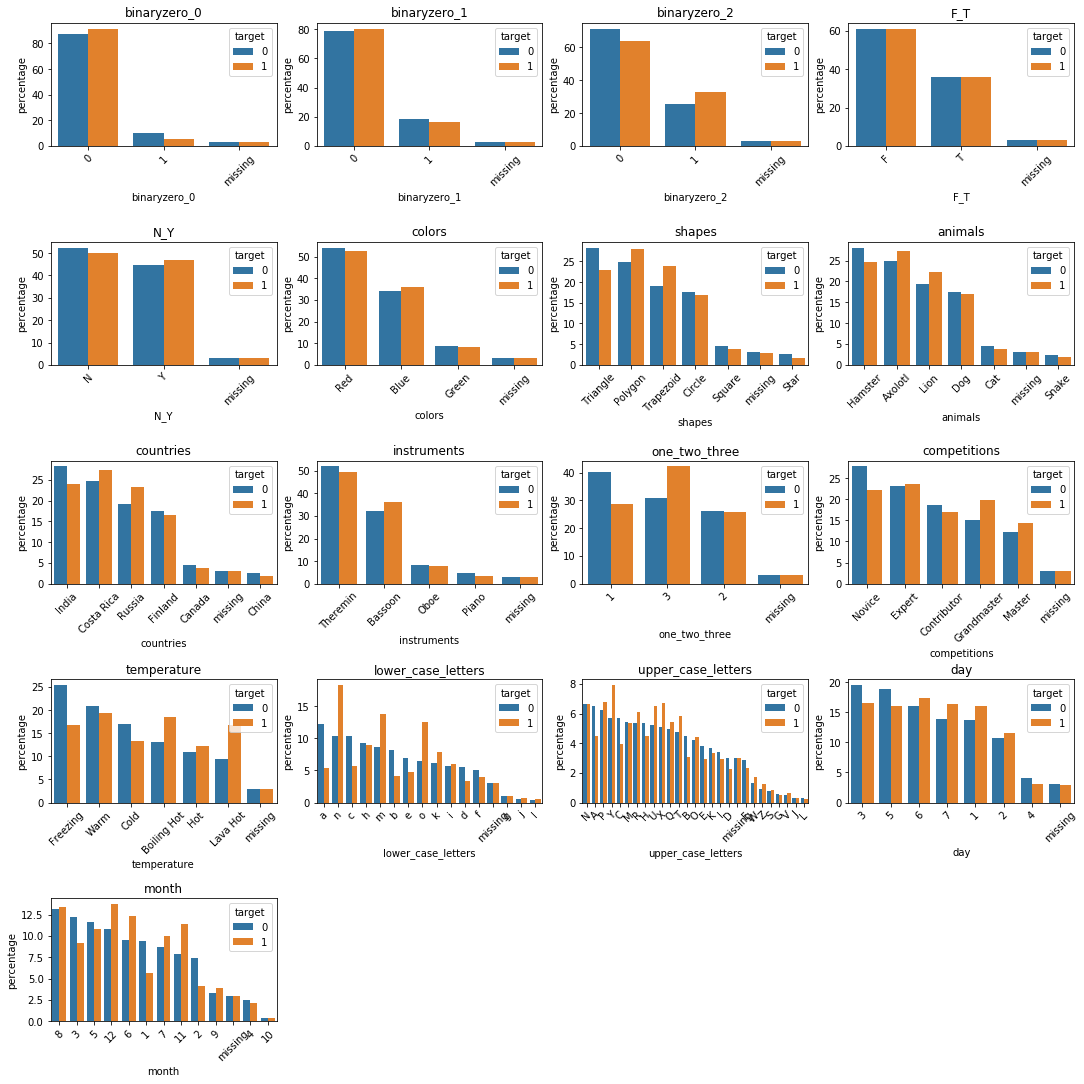

In [32]:
#relative distribution of categories grouped by target variable for features with low cardinality
_=plt.figure(figsize=(15,15))
n=1
for col in data.columns:
    if col == 'target':
        continue
    if data[col].nunique() < 100:
        values=(data.groupby(['target'])[col]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
        _ = plt.subplot(5,4,n)
        _ = sns.barplot(x=col, y="percentage", hue="target", data=values)
        _ = plt.title(col)
        _ = plt.xticks(rotation=45)
        _ = plt.tight_layout(pad=0.5)
        n= n+1

In [76]:
animals_cat_0 = data[data['target']==0]['animals'].value_counts()
countries_cat_0 = data[data['target']==0]['countries'].value_counts()
animal_countrie = pd.concat([animals_cat_0, countries_cat_0], axis = 0)
animal_countrie=animal_countrie.to_frame().reset_index()
animal_countrie.rename(columns={'index':'category', 0:'count'}, inplace=True)
animal_countrie.sort_values('count', inplace=True, ascending=False)
animal_countrie

,category,count
7,India,137935
0,Hamster,137192
1,Axolotl,121687
8,Costa Rica,121031
2,Lion,94428
9,Russia,93531
10,Finland,85883
3,Dog,85759
11,Canada,22201
4,Cat,21889


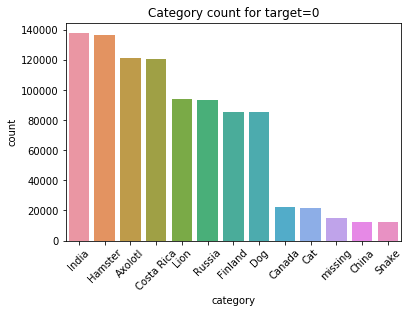

In [77]:
#comparison of number of categories of countries and animals columns
_ = sns.barplot(x='category', y='count', data=animal_countrie)
_ = plt.xticks(rotation=45)
_ = plt.title('Category count for target=0')
plt.show()

In [78]:
animals_cat_1 = data[data['target']==1]['animals'].value_counts()
countries_cat_1 = data[data['target']==1]['countries'].value_counts()
animal_countrie = pd.concat([animals_cat_1, countries_cat_1], axis = 0)
animal_countrie=animal_countrie.to_frame().reset_index()
animal_countrie.rename(columns={'index':'category', 0:'count'}, inplace=True)
animal_countrie.sort_values('count', inplace=True, ascending=False)
animal_countrie

,category,count
7,Costa Rica,30796
0,Axolotl,30632
1,Hamster,27705
8,India,26934
9,Russia,26309
2,Lion,25076
3,Dog,19066
10,Finland,18718
4,Cat,4387
11,Canada,4224


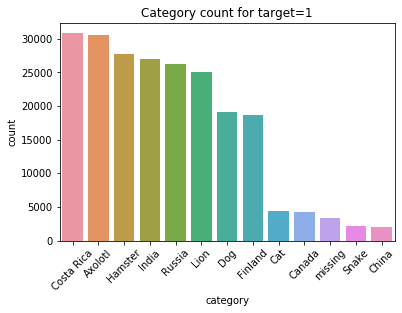

In [79]:
#comparison of number of categories of countries and animals columns
_ = sns.barplot(x='category', y='count', data=animal_countrie)
_ = plt.xticks(rotation=45)
_ = plt.title('Category count for target=1')
plt.show()

*For lower case and upper case letters there is a higher percentage of letters in second half (alphabeth order) when target is 1. For days 6,7,1,2 there is higher percentage of target 1. When it comes to months higher percentage of target 1 is seen from 6th to 12th month. For temperature column higher percentage of target 1 is seen for Hot, Boiling Hot and Lava Hot. For competition column higher percentage of target 1 is seen for Expert, Master and Grand Master.<br/>
Missing values show up equally in almost every feature, except for shapes, letters, days and months.* <br/>

*Comparing relative distributions of categories for target 0 and target 1, it could be noticed that some features have less effect on the target classification:*
1. "F_T" - equal amounts of categories when target is 0 and 1
2. "Animals" and "countries" - have very similar count and distribution of categories. One of the columns can be choosen.

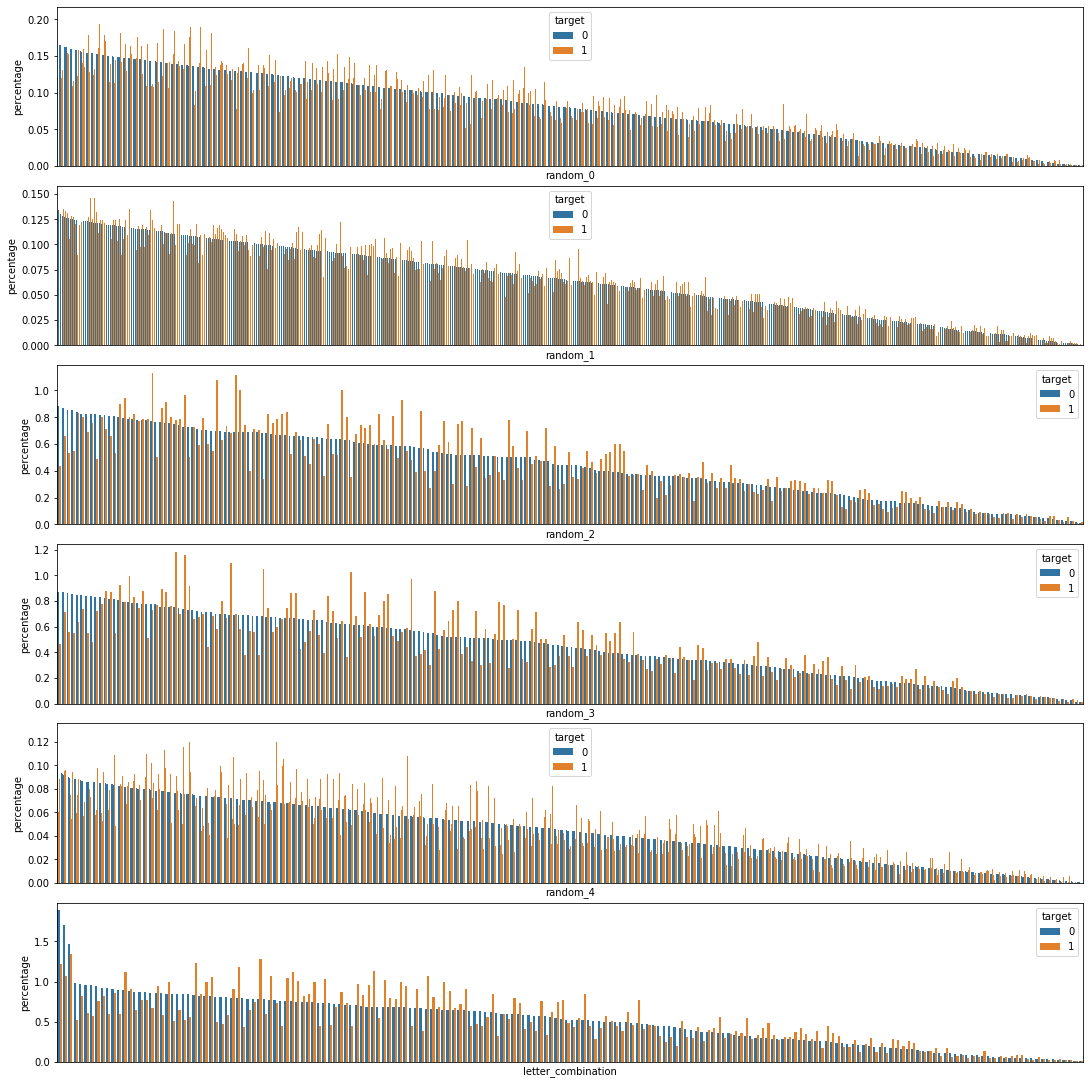

In [33]:
#relative distribution of categories grouped by target variable for features with high cardinality
#drop missing categorie in order to achieve better visibillity of other categories 
_=plt.figure(figsize=(15,15))
n=1
for col in data.columns:
    if col == 'id':
        continue
    if data[col].nunique() > 100:
        values=(data.groupby(['target'])[col]
                     .value_counts(normalize=True, dropna=False)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
        values=values[values[col]!='missing']
        _ = plt.subplot(6,1,n)
        _ = sns.barplot(x=col, y="percentage", hue="target", data=values)
        _ = plt.xticks([])
        _ = plt.tight_layout(pad=0.5)
        n= n+1

- Random_0 - Distribution of categories is different when target is 0 and 1<br/>
- Random_1 - There are overlapping groups of categories when target is 0 and 1 <br/>
- Random_2 and random_3 - Distribution of categories is different when target is 0 and 1, but features overall have similar distributio <br/>
- Random_4 - Distribution of categories is different when target is 0 and 1<br/>
- Letter_combination - Distribution of categories is different when target is 0 and 1

### Relation between variables

*In general features look very random and except some similarities in distribution there is no any visible relationship. To measure a relationship between features, Cramer's function will be used.*

#### Cramer

In [64]:
test = data.drop(columns=['id'])

In [65]:
import scipy.stats as ss
from collections import Counter
import math

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))  

In [66]:
cramer_rel=pd.DataFrame(np.zeros((len(test.columns),len(test.columns))), index=test.columns, columns=test.columns)
for i in range(len(test.columns)):
    for j in range(len(test.columns)):
        if i != j:
            cramer_rel.iloc[i,j]=cramers_v(test[test.columns[i]],test[test.columns[j]])

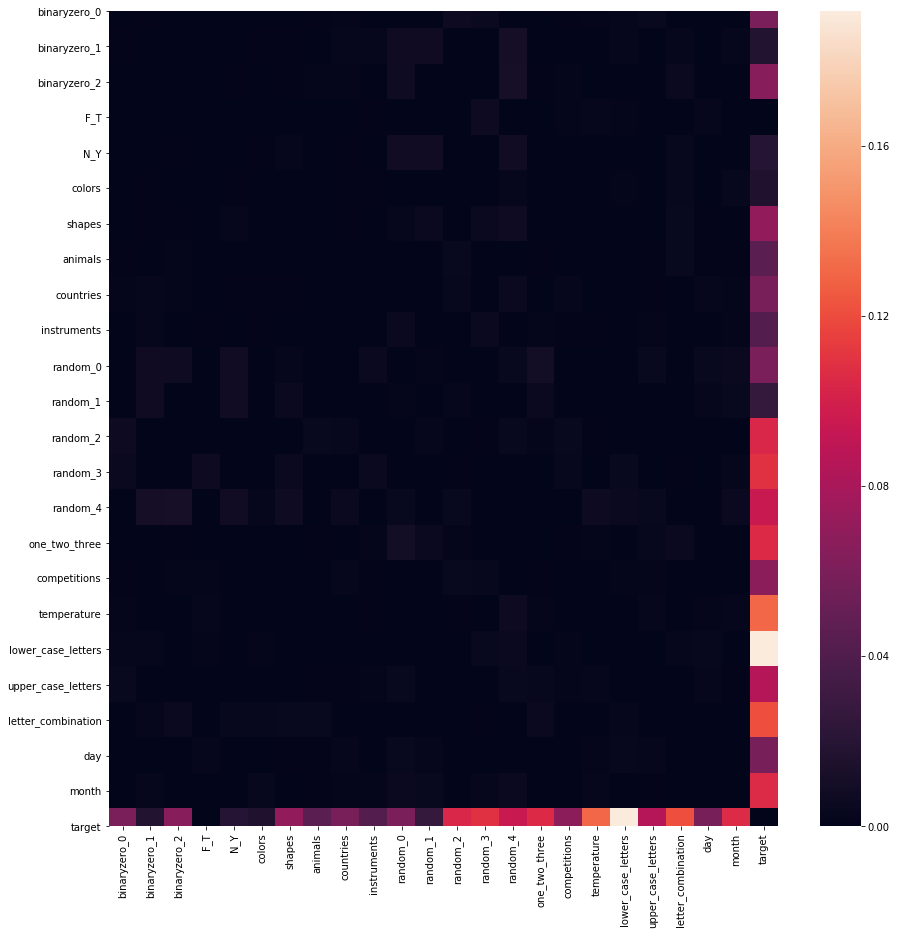

In [67]:
fig, ax = plt.subplots(figsize=(15,15))        
display(sns.heatmap(cramer_rel, linewidths=.000005, ax=ax))
_=plt.yticks(rotation=0)       

In [68]:
THRESHOLD=0.15
for i in range(cramer_rel.shape[0]):
    for j in range(cramer_rel.shape[0]):
        if j!=i:
            if cramer_rel.iloc[i,j] >=THRESHOLD:
                print("Column [" + test.columns[i] + "] can be explained through Column [" + test.columns[j]+"], 'cause are highly correlated  <"+str(cramer_rel.iloc[i,j])+">" )

Column [lower_case_letters] can be explained through Column [target], 'cause are highly correlated  <0.19167763290525328>
Column [target] can be explained through Column [lower_case_letters], 'cause are highly correlated  <0.1916776329052533>


*As suspected non of he features have relationship between themselves.*

## Encoding variables

1. One - Hot encoding: F_T, N_Y, colors, shapes, animal, countries, instruments, lover_case_letters, upper_case_letter 
2. Ordinal encoding: one_two_three, competitors, temperature, day, month
3. Encoding high cardicality categorical data (target encoding or hash encoding): random_1, random_2, random_3, ramdom_4

In [13]:
data_encoded = data.copy()

In [14]:
data_encoded.columns

Index(['id', 'binaryzero_0', 'binaryzero_1', 'binaryzero_2', 'F_T', 'N_Y',
       'colors', 'shapes', 'animals', 'countries', 'instruments', 'random_0',
       'random_1', 'random_2', 'random_3', 'random_4', 'one_two_three',
       'competitions', 'temperature', 'lower_case_letters',
       'upper_case_letters', 'letter_combination', 'day', 'month', 'target'],
      dtype='object')

### One-Hot encoding

In [14]:
# data_encoded = pd.get_dummies(data_encoded, columns=['binaryzero_0', 'binaryzero_1','binaryzero_2', 'N_Y',
#                                                      'colors', 'shapes', 'animals', 'countries',
#                                                     'instruments', 'random_0','random_1', 'random_2', 'random_3',
#                                                      'random_4', 'lower_case_letters', 'upper_case_letters', 
#                                                      'letter_combination'], 
#                               prefix = ['binaryzero_0', 'binaryzero_1','binaryzero_2', 'N_Y', 'colors', 'shapes', 
#                                         'animals', 'countries','instruments', 'random_0','random_1', 'random_2',
#                                         'random_3', 'random_4', 'lower_case_letters', 'upper_case_letters',
#                                         'letter_combination'],
#                               drop_first=True)

First idea was to use one-hot encoding to encode all binary features, some ordinal like lower_case_letters, upper_case_letters and all high cardinality features, and to use ordinal encoder for the rest of the features. <br/>
This resulted in dataframe with 600000 rows and over 5000 features. In order to lower dimensionality and to choose combination of features that are most important for classification, the idea was to use PCA method.<br/>
Due to size of the dataframe and high memory consumption by PCA process, on personal machine this couldn't be performed. Every attempt to perform this process, even by choosing few of the high cardinality features, failed due to lack of the memory. <br/>
Probably these idea would result in the most accurate model, but without cluster it cannot be performed.

Second idea is to use other types of encoder for high cardinality features:<br/>
https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159 <br/>
From article my conclusion was that it is best to use target encoder or hash encoder. I decided to use target encoder, since it is easier to understand abd track what it is doing with categories.<br/>
https://medium.com/@venkatasai.katuru/target-encoding-done-the-right-way-b6391e66c19f

In [15]:
data_encoded = pd.get_dummies(data_encoded, columns=['binaryzero_0', 'binaryzero_1','binaryzero_2', 'N_Y', 'F_T',
                                                     'colors', 'shapes', 'animals', 'countries',
                                                    'instruments', 'lower_case_letters', 'upper_case_letters'], 
                              prefix = ['binaryzero_0', 'binaryzero_1','binaryzero_2', 'N_Y', 'F_T', 'colors', 'shapes', 
                                        'animals', 'countries', 'instruments', 'lower_case_letters', 'upper_case_letters'],
                              drop_first=True)

In [16]:
data_encoded.shape

(600000, 89)

### Ordinal encoding

In [17]:
#one_two_three
ordinal_encoder = OrdinalEncoder(categories=[['missing', '1', '2', '3']])

data_encoded['one_two_three'] = ordinal_encoder.fit_transform(data_encoded['one_two_three'].values.reshape(-1,1))

In [18]:
#competitions
ordinal_encoder = OrdinalEncoder(categories=[['missing', 'Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']])

data_encoded['competitions'] = ordinal_encoder.fit_transform(data_encoded['competitions'].values.reshape(-1,1))

In [19]:
#temperature
ordinal_encoder = OrdinalEncoder(categories=[['missing', 'Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']])

data_encoded['temperature'] = ordinal_encoder.fit_transform(data_encoded['temperature'].values.reshape(-1,1))

In [20]:
#day
ordinal_encoder = OrdinalEncoder(categories=[['missing', '1', '2', '3', '4', '5', '6','7']])

data_encoded['day'] = ordinal_encoder.fit_transform(data_encoded['day'].values.reshape(-1,1))

In [21]:
#month
ordinal_encoder = OrdinalEncoder(categories=[['missing', '1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12']])

data_encoded['month'] = ordinal_encoder.fit_transform(data_encoded['month'].values.reshape(-1,1))

### Encoding high cardinality features

#### Target encoding

In [22]:
col=['random_0', 'random_1', 'random_2', 'random_3' ,'random_4', 'letter_combination']
target_encoder = ce.TargetEncoder(cols=['random_0', 'random_1', 'random_2', 'random_3', 'random_4', 'letter_combination'], smoothing=10)
data_encoded[col]= target_encoder.fit_transform(data_encoded[col], data_encoded['target'])

In [23]:
data_encoded.shape

(600000, 89)

In [24]:
data_encoded.head()

,id,random_0,random_1,random_2,random_3,random_4,one_two_three,competitions,temperature,letter_combination,day,month,target,binaryzero_0_1,binaryzero_0_missing,binaryzero_1_1,binaryzero_1_missing,binaryzero_2_1,binaryzero_2_missing,N_Y_Y,N_Y_missing,F_T_T,F_T_missing,colors_Green,colors_Red,colors_missing,shapes_Polygon,shapes_Square,shapes_Star,shapes_Trapezoid,shapes_Triangle,shapes_missing,animals_Cat,animals_Dog,animals_Hamster,animals_Lion,animals_Snake,animals_missing,countries_China,countries_Costa Rica,countries_Finland,countries_India,countries_Russia,countries_missing,instruments_Oboe,instruments_Piano,instruments_Theremin,instruments_missing,lower_case_letters_b,lower_case_letters_c,lower_case_letters_d,lower_case_letters_e,lower_case_letters_f,lower_case_letters_g,lower_case_letters_h,lower_case_letters_i,lower_case_letters_j,lower_case_letters_k,lower_case_letters_l,lower_case_letters_m,lower_case_letters_missing,lower_case_letters_n,lower_case_letters_o,upper_case_letters_B,upper_case_letters_C,upper_case_letters_D,upper_case_letters_E,upper_case_letters_F,upper_case_letters_G,upper_case_letters_H,upper_case_letters_I,upper_case_letters_J,upper_case_letters_K,upper_case_letters_L,upper_case_letters_M,upper_case_letters_N,upper_case_letters_O,upper_case_letters_P,upper_case_letters_Q,upper_case_letters_R,upper_case_letters_S,upper_case_letters_T,upper_case_letters_U,upper_case_letters_V,upper_case_letters_W,upper_case_letters_X,upper_case_letters_Y,upper_case_letters_Z,upper_case_letters_missing
0,0,0.209756,0.161017,0.103301,0.128509,0.164251,3.0,2.0,4.0,0.143608,6.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0.193767,0.200913,0.129012,0.197291,0.152830,3.0,5.0,3.0,0.236897,7.0,7.0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,0.181311,0.163690,0.262747,0.172607,0.187849,3.0,0.0,1.0,0.208738,5.0,9.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3,0.207358,0.203390,0.144197,0.224036,0.268456,1.0,1.0,6.0,0.184215,3.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0.152913,0.162055,0.195469,0.191777,0.250000,3.0,5.0,2.0,0.160131,5.0,12.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**After encoding high cardinality features with target encoding it is easier to see and compare distribution. This should be part of feature selection section, but due to encoding process, final comparison of high cardinality features distribution will be comapre in the next sections.**

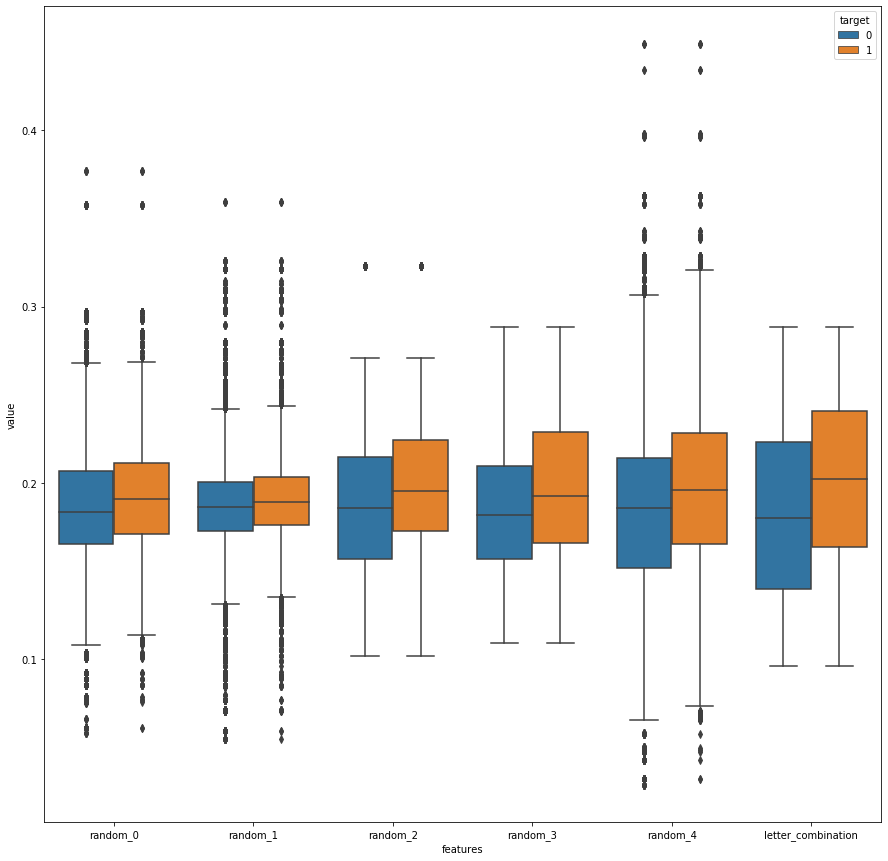

In [40]:
random_var = data_encoded[['random_0', 'random_1', 'random_2', 'random_3' ,'random_4', 'letter_combination', 'target']]
random_var = pd.melt(random_var,id_vars="target", var_name="features", value_name='value')
_ = plt.figure(figsize=(15,15))
_ = sns.boxplot(x="features", y="value", hue='target', data=random_var)

*Looking at the distribution of encoded values when target is 1 and 0, we can notice that random_1 feature has similar distribution and so we can assume that it will have less effect on classification.<br/> 
Random_2 and Random_3 variables in general have similar distribution, so we could choose one of them for our model. Maybe it is better to use random_3 since it has wider distribution and no outliers.*

In [41]:
#Compare distribution of random_1 for target=1 and target=0 using Kolmogorov-Smirnov statistic on 2 samples
random_1_1 = data_encoded[data_encoded['target']==1]['random_1']
random_1_0 = data_encoded[data_encoded['target']==0]['random_1']

distribution_diff = stats.ks_2samp(random_1_0, random_1_1)
distribution_diff

Ks_2sampResult(statistic=0.0554516824372428, pvalue=2.934066422070441e-244)

In [42]:
#Compare distribution of random_2 and random_3 for target=1 using Kolmogorov-Smirnov statistic on 2 samples
random_2_1 = data_encoded[data_encoded['target']==1]['random_2']
random_3_1 = data_encoded[data_encoded['target']==1]['random_3']

distribution_diff = stats.ks_2samp(random_2_1, random_3_1)
distribution_diff

Ks_2sampResult(statistic=0.07862147556600163, pvalue=5.856748238129013e-302)

In [43]:
#Compare distribution of random_2 and random_3 for target=0 using Kolmogorov-Smirnov statistic on 2 samples
random_2_0 = data_encoded[data_encoded['target']==0]['random_2']
random_3_0 = data_encoded[data_encoded['target']==0]['random_3']

distribution_diff = stats.ks_2samp(random_2_0, random_3_0)
distribution_diff

Ks_2sampResult(statistic=0.08699200495409876, pvalue=0.0)

*Although distributions looks similar, by KS test there is significant difference between them, so features will be used in ML models.*

## Final list of features

Due to similarities in category count when target is 0 and 1 "F_T" feature was removed from modeling. 'Countries' column was removed as well, because category distribution between 'animals' and 'countries' columns is similar. <br/>
After building models without these two columns best achieved score was 0.71. Once columns were included into the model overall score didn't change, but addition of these two columns had positive effect on categorizing class 1.<br/>
So at the end all of the features are used in the models.

## Functions for measuring model accuracy

In [25]:
def model_evaluation(y, y_pred):
     
    #Classification report
    print('================Classification report================')
    print(classification_report(y, y_pred, target_names=['class 0', 'class 1']))
    
    #Confusion matrix
    print('================Confusion matrix================')
    print(confusion_matrix(y, y_pred))
    
    #f1 score
    print('================F1 score================')
    print(f1_score(y, y_pred, average='macro'))
    
    #recall
    print('================Recall================')
    print(recall_score(y, y_pred, average='macro'))

    #precision
    print('================Precision================')
    print(precision_score(y, y_pred, average='macro'))

    #accuracy
    print('================Accuracy================')
    print(accuracy_score(y, y_pred))      

In [26]:
def auc_roc(model, X_test, y_test, X_train, y_train):
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    AUC_score_test = metrics.roc_auc_score(y_test, y_pred_prob)
    print('AUC test: %.3f' %(AUC_score_test))
    
    y_pred_train_prob = model.predict_proba(X_train)[:, 1]
    AUC_score_train = metrics.roc_auc_score(y_train, y_pred_train_prob)
    print('AUC train: %.3f' %(AUC_score_train))
    
    _ = plt.figure(figsize=(12,5))
    _ = plt.plot([0, 1], [0, 1], 'k--', label='reference line')
    _ = plt.plot(fpr, tpr, label='random forest')
    _ = plt.xlabel('False positive rate')
    _ = plt.ylabel('True positive rate')
    _ = plt.title('ROC curve')
    _ = plt.legend(loc='best')
    _ = plt.show()

## Models without undersampling and PCA

In [88]:
X = data_encoded.drop(['id', 'target'], axis=1)
y = data_encoded['target']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0, stratify=y)

### Logistic Regression

In [90]:
params_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 50, 100]}
n_folds = 5
f1_macro_score = make_scorer(f1_score, average='macro')
grid_search = GridSearchCV(LogisticRegression(random_state=0, solver='sag'), params_grid, cv=n_folds, return_train_score=True, scoring=f1_macro_score, n_jobs=-2)

In [91]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='sag',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=0)

In [92]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.61


In [93]:
#train and test scores
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test set score: 0.61
Train set score: 0.61


In [94]:
best_param_model = grid_search.best_estimator_
best_param_model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### Built the model

In [95]:
model = best_param_model.fit(X_train, y_train)

In [96]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.84      0.97      0.90    146303
     class 1       0.60      0.21      0.31     33697

    accuracy                           0.83    180000
   macro avg       0.72      0.59      0.61    180000
weighted avg       0.80      0.83      0.79    180000

================Confusion matrix================
[[141624   4679]
 [ 26544   7153]]
================F1 score================
0.6074649686861977
================Recall================
0.5901462585958023
================Precision================
0.7233524166840597
================Accuracy================
0.8265388888888889
/nTrain dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.84      0.97      0.90    341374
     class 1       0.60      0.22      0.32     78626

    accuracy                           0.83    42

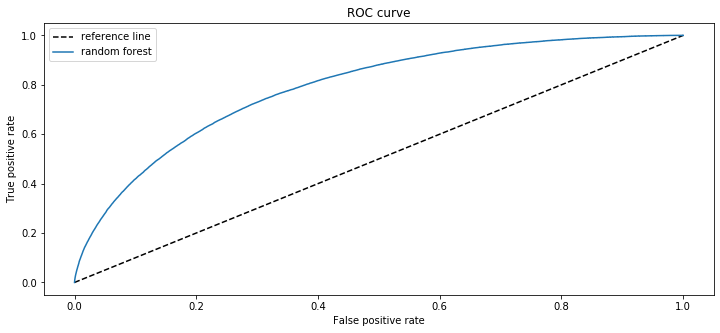

In [97]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

Confusion matrix without normalization
[[141624   4679]
 [ 26544   7153]]
Confusion matrix with norrmalization
[[0.96801843 0.03198157]
 [0.78772591 0.21227409]]


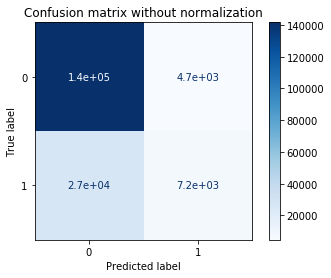

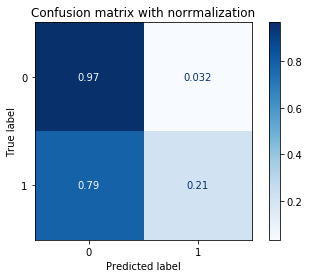

In [98]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

Without undersampling and feature selection with PCA, LogisticRegression model gives a F1 score of 0.61 for test and train data set. From classification report, it could be noticed that model is much more successful for class 0 than class 1. For class 0 F1 score is 0.90 and for class 1 F1 score is 0.31, which is expected considering that classes are imbalanced.

### Logistic Regression with class weight

In [99]:
params_grid = {'C':[10]}
n_folds = 3
f1_macro_score = make_scorer(f1_score, average='macro')
grid_search = GridSearchCV(LogisticRegression(random_state=0, max_iter=1000000, solver='sag', class_weight = {0:1, 1:100}), params_grid, cv=n_folds, return_train_score=True, scoring=f1_macro_score, n_jobs=-2)

In [101]:
grid_search.fit(X_train, y_train)

In [37]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.54


In [ ]:
#train and test scores
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

In [ ]:
best_param_model = grid_search.best_estimator_
best_param_model

#### Build the model

In [ ]:
model = best_param_model.fit(X_train, y_train)

In [ ]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

In [ ]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

It was not possilble to obtain results. Takes to much time to calculate! 

### Decision Tree

In [102]:
params_grid = {'max_depth':[10,13,15]}
n_folds = 5
f1_macro_score = make_scorer(f1_score, average='macro')
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=0), params_grid, cv=n_folds, return_train_score=True, scoring=f1_macro_score, n_jobs=-2)

In [103]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-2,
             param_grid={'max_depth': [10, 13, 15]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True

In [104]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 15}
Best cross-validation score: 0.56


In [105]:
#train and test scores
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test set score: 0.56
Train set score: 0.69


In [106]:
best_param_model = grid_search.best_estimator_
best_param_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Build the model

In [107]:
model = best_param_model.fit(X_train, y_train)

In [108]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.83      0.94      0.88    146303
     class 1       0.41      0.16      0.23     33697

    accuracy                           0.80    180000
   macro avg       0.62      0.55      0.56    180000
weighted avg       0.75      0.80      0.76    180000

================Confusion matrix================
[[138180   8123]
 [ 28162   5535]]
================F1 score================
0.5588540423736893
================Recall================
0.5543680930876878
================Precision================
0.6179775961663818
================Accuracy================
0.7984166666666667
/nTrain dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.86      0.98      0.92    341374
     class 1       0.79      0.32      0.45     78626

    accuracy                           0.86    42

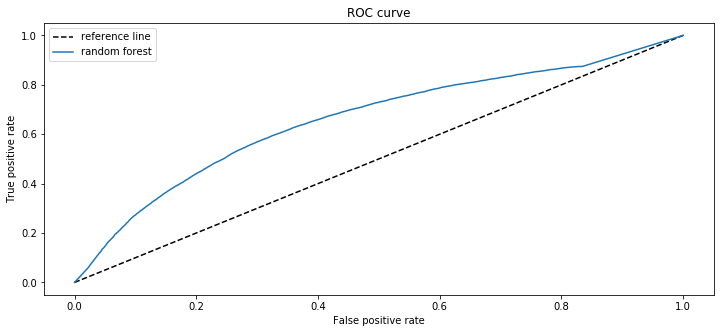

In [109]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

Confusion matrix without normalization
[[138180   8123]
 [ 28162   5535]]
Confusion matrix with norrmalization
[[0.94447824 0.05552176]
 [0.83574205 0.16425795]]


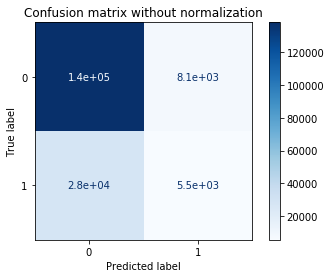

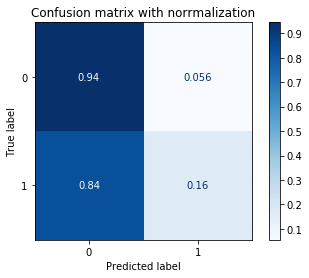

In [110]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

Looking at the parameters DecisionTree model is worse than Logistic Resgression model: 
- There is an overfit for train data F1 score 0.69 and for test data F1 score is 0.56
- Same issue appears as in Linear Regression. Model is able to predict class 0 with much higher accuracy than class 1. Test data class 0 F1 score 0.88, class 1 F1 score 0.23. Train data class 0 F1 score 0.92, class 1 F1 score 0.45.
Model is tested with different max_depth. If max depth is lower than 10, this warning is reported:<br/>
*"UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.".*<br/> This means that model is not able to predict some of the values.With max depth less than 10, there is no overfit and acuracy of a model for  test and train is 0.50 and 0.52. Again model has high accuracy for class 0 (F1 score 0.90) but much lower for class 1 (F1 score 0.12). <br/>
Adding max_leaf_nodes hyperparameter results in the same warning.

## Models with undersampling

As seen in prevoius models the main issue for getting accurate model is imbalance between class 0 and class 1. To balance the two classes undersampling or oversampling can be performed. Due to size of the dataset, undersampling of class 0 will be performed.<br/>
Because of the dataset size, undersampling with cluster centroids cannot be performed in a reasonable time. For that reason random undersampling will be performed.

In [50]:
# from imblearn.under_sampling import ClusterCentroids

# # ClusterCentroids
# sampler = ClusterCentroids()
# X_cc, y_cc = sampler.fit_sample(X, y)

### Random undersampling

In [23]:
#random undersampling
count_class_0, count_class_1 = data_encoded.target.value_counts()
print(count_class_0)
print(count_class_1)

487677
112323


In [24]:
# Divide by class
df_class_0 = data_encoded[data_encoded['target'] == 0]
df_class_1 = data_encoded[data_encoded['target'] == 1]

In [25]:
df_class_0_under = df_class_0.sample(count_class_1)
print(df_class_0_under.shape)

(112323, 89)


Random under-sampling:
1    112323
0    112323
Name: target, dtype: int64


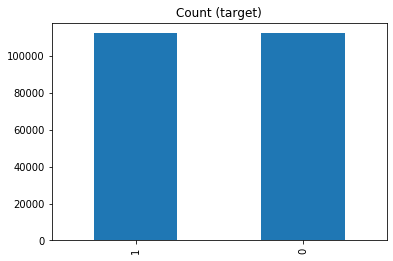

In [26]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [27]:
X = df_test_under.drop(['id', 'target'], axis=1)
y = df_test_under['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y)

### Logistic Regression with undersampling

In [117]:
params_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 50, 100]}
n_folds = 5
f1_macro_score = make_scorer(f1_score, average='macro')
grid_search = GridSearchCV(LogisticRegression(random_state=0, solver='sag', max_iter=100000), params_grid, cv=n_folds, return_train_score=True, scoring=f1_macro_score, n_jobs=-2)

In [118]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='sag',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=0)

In [119]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.72


In [120]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test set score: 0.71
Train set score: 0.72


#### Build the model

In [121]:
best_param_model = grid_search.best_estimator_
best_param_model

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
model = best_param_model.fit(X_train, y_train)

In [123]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.72      0.71      0.71     33697
     class 1       0.71      0.72      0.72     33697

    accuracy                           0.71     67394
   macro avg       0.71      0.71      0.71     67394
weighted avg       0.71      0.71      0.71     67394

================Confusion matrix================
[[23901  9796]
 [ 9459 24238]]
================F1 score================
0.7142849293296858
================Recall================
0.7142920734783511
================Precision================
0.714313508645396
================Accuracy================
0.7142920734783512

Train dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.72      0.71      0.71     78626
     class 1       0.71      0.72      0.72     78626

    accuracy                           0.72    157252
 

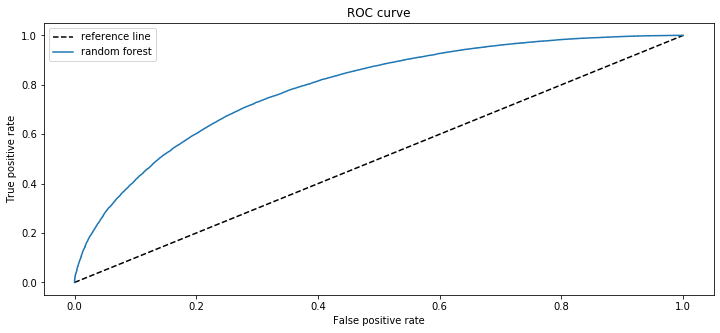

In [124]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('\nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

Confusion matrix without normalization
[[23901  9796]
 [ 9459 24238]]
Confusion matrix with norrmalization
[[0.70929163 0.29070837]
 [0.28070748 0.71929252]]


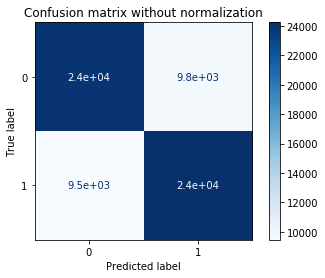

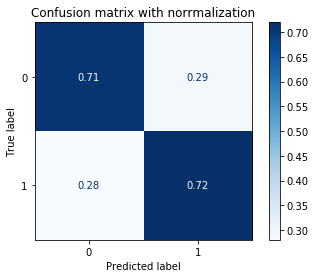

In [125]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

With undersampling there is much improvement in model accuracy and stability. Both test and train have F1 score around 0.71. For class 1 F1 score is 0.72 and for class 0 F1 score is 0.71.

### Decision Tree

In [126]:
params_grid = {'max_depth':range(3,15)}
n_folds = 5
f1_macro_score = make_scorer(f1_score, average='macro')
grid_search = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=0), params_grid, cv=n_folds, return_train_score=True, scoring=f1_macro_score, n_jobs=-2)

In [127]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-2,
             param_grid={'max_depth': range(3, 15)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True

In [128]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 11}
Best cross-validation score: 0.64


In [129]:
#train and test scores
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test set score: 0.64
Train set score: 0.69


In [130]:
best_param_model = grid_search.best_estimator_
best_param_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#### Build the model

In [131]:
model = best_param_model.fit(X_train, y_train)

In [132]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.64      0.67      0.65     33697
     class 1       0.65      0.62      0.64     33697

    accuracy                           0.64     67394
   macro avg       0.64      0.64      0.64     67394
weighted avg       0.64      0.64      0.64     67394

================Confusion matrix================
[[22551 11146]
 [12822 20875]]
================F1 score================
0.6441399499120348
================Recall================
0.6443600320503309
================Precision================
0.6447180363261895
================Accuracy================
0.6443600320503309
/nTrain dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.68      0.72      0.70     78626
     class 1       0.70      0.66      0.68     78626

    accuracy                           0.69    157252

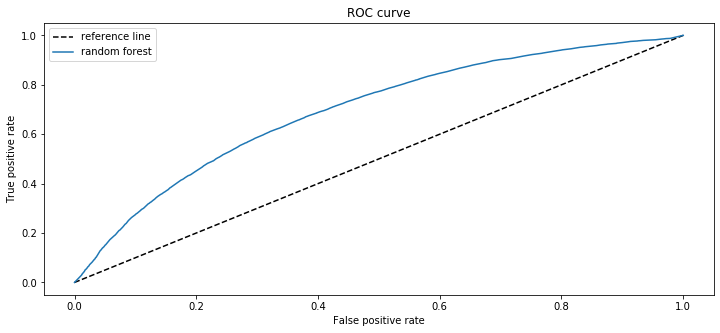

In [133]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

Confusion matrix without normalization
[[22551 11146]
 [12822 20875]]
Confusion matrix with norrmalization
[[0.66922871 0.33077129]
 [0.38050865 0.61949135]]


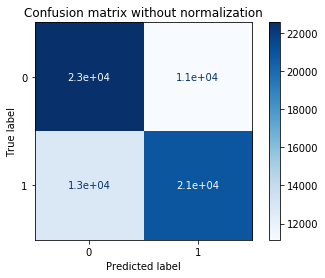

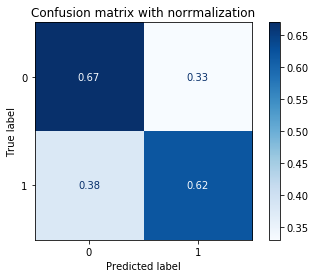

In [134]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

There is improvment in decision tree model after undersampling, but because of the less F1 score and overfit Logistic Regression model is better for this data set.

### Random Forest

In [135]:
#GridSearch and CV
param_grid = {'n_estimators': [100,150], 'max_depth':range(8,10)}
n_folds = 5
grid_search = GridSearchCV(RandomForestClassifier(criterion = 'entropy', random_state = 0, n_jobs=-2), param_grid, cv=n_folds,return_train_score=True)

In [136]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-2,
                                              oob_score=False, rand

In [137]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9, 'n_estimators': 150}
Best cross-validation score: 0.69


In [138]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test set score: 0.69
Train set score: 0.71


In [139]:
best_param_model = grid_search.best_estimator_
best_param_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-2, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Build the model

In [140]:
model = best_param_model.fit(X_train, y_train)

In [141]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.69      0.68      0.69     33697
     class 1       0.69      0.70      0.69     33697

    accuracy                           0.69     67394
   macro avg       0.69      0.69      0.69     67394
weighted avg       0.69      0.69      0.69     67394

================Confusion matrix================
[[22916 10781]
 [10110 23587]]
================F1 score================
0.6899861839620713
================Recall================
0.6900169154524142
================Precision================
0.6900922904077833
================Accuracy================
0.6900169154524142
/nTrain dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.72      0.70      0.71     78626
     class 1       0.71      0.72      0.71     78626

    accuracy                           0.71    157252

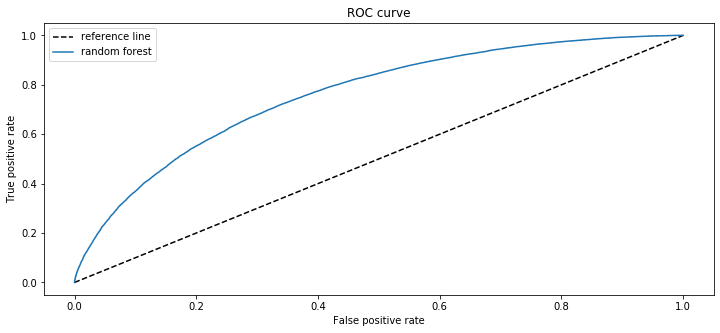

In [142]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

Confusion matrix without normalization
[[22916 10781]
 [10110 23587]]
Confusion matrix with norrmalization
[[0.68006054 0.31993946]
 [0.30002671 0.69997329]]


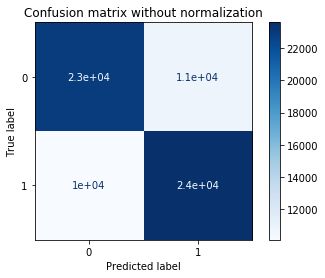

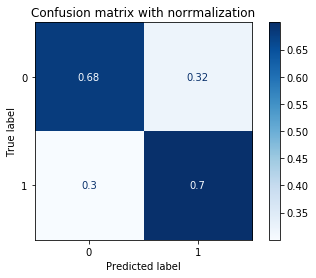

In [143]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

Random forest is better than Decision tree. F1 score is better and there is less overfit. In order to achieve these F1 scores, model requires high number of estimators (150). Maybe tunning other hyperparameters could help, but from negative experience with Decision tree other hyperparametrs like max_leaf_nodes, max_features are not tested. Also model takes more time and resources, and results are worst than the Logistic Regression.

### Gradient Boosted Decision Tree

In [53]:
#GridSearch and CV
param_grid = {'n_estimators' : [50, 60, 70] ,'max_depth':[6,7,8],'learning_rate':[0.2,0.3]}
n_folds = 2
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=n_folds,return_train_score=True, n_jobs =-2)

In [54]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [55]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 70}
Best cross-validation score: 0.71


In [56]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test set score: 0.71
Train set score: 0.74


In [57]:
best_param_model = grid_search.best_estimator_
best_param_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Built model

In [58]:
model = best_param_model.fit(X_train, y_train)

In [59]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.71      0.70      0.71     33697
     class 1       0.70      0.71      0.71     33697

    accuracy                           0.71     67394
   macro avg       0.71      0.71      0.71     67394
weighted avg       0.71      0.71      0.71     67394

================Confusion matrix================
[[23607 10090]
 [ 9606 24091]]
================F1 score================
0.707733390291528
================Recall================
0.7077484642549783
================Precision================
0.7077913324971554
================Accuracy================
0.7077484642549782
/nTrain dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.75      0.74      0.74     78626
     class 1       0.74      0.75      0.75     78626

    accuracy                           0.74    157252


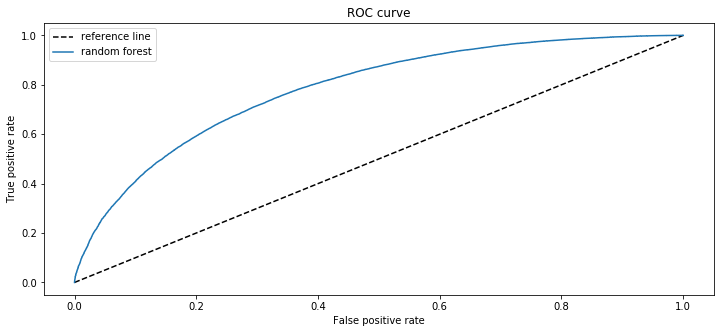

In [60]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

In [ ]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

Gradient Boosted Decision Tree model can achieve accuracy of Logistic Regression for test data set. There is an ovefitting that could be potentially removed by lowering max_depth parameter.

## Models with undersampling and PCA

In [28]:
X = df_test_under.drop(['id', 'target'], axis=1)
y = df_test_under['target']

In [29]:
X_stand = X.copy()

In [30]:
# Data standardization
for col in X_stand.columns:
    X_stand[col]= StandardScaler().fit_transform(X_stand[col][:,np.newaxis]);

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_stand,y, test_size = 0.3, random_state = 0, stratify = y)

In [135]:
# from imblearn.under_sampling import ClusterCentroids

# # ClusterCentroids
# sampler = ClusterCentroids(n_jobs=-2)
# X_cc, y_cc = sampler.fit_sample(X_stand, y)

In [32]:
#PCA
from sklearn.decomposition import PCA 

pca = PCA()

pca_X_stand = pca.fit(X_train) 

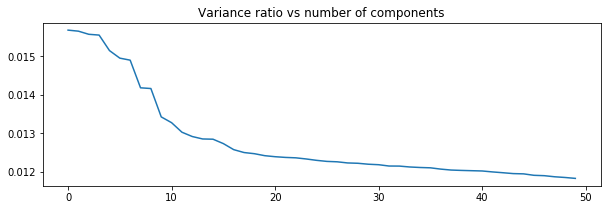

In [33]:
_=plt.subplots(figsize=(10,3)) 
_=plt.plot(pca.explained_variance_ratio_[:50]) 
_=plt.title("Variance ratio vs number of components")

In [34]:
# Applying PCA 
pca = PCA(n_components=87) 
X_train_PCA = pca.fit_transform(X_train) 
X_test_PCA = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.0156789 , 0.01565197, 0.01557086, 0.01555042, 0.01514777,
       0.01495149, 0.01489887, 0.01418087, 0.01416245, 0.01342556,
       0.01327498, 0.01302761, 0.01291558, 0.01285246, 0.01284625,
       0.01273199, 0.01257511, 0.0124999 , 0.01246979, 0.01241826,
       0.01239158, 0.01237328, 0.01236258, 0.01233299, 0.0122974 ,
       0.01226985, 0.01225918, 0.01222964, 0.01222097, 0.01219659,
       0.01218368, 0.01214969, 0.01214793, 0.01212485, 0.01211149,
       0.01210316, 0.01206938, 0.01204512, 0.01203557, 0.01202821,
       0.012021  , 0.01199647, 0.01197554, 0.01195299, 0.01194609,
       0.01190863, 0.01189878, 0.01187055, 0.01185225, 0.01182857,
       0.01182252, 0.01180496, 0.01175372, 0.01174044, 0.01171595,
       0.01169388, 0.01165464, 0.0115855 , 0.01156415, 0.01155186,
       0.01151815, 0.01150427, 0.01145904, 0.01142446, 0.01142294,
       0.01140742, 0.01136746, 0.01136333, 0.01132409, 0.01132095,
       0.01130049, 0.01128381, 0.01124268, 0.01122084, 0.01114

### Logistic Regression

In [158]:
params_grid = {'C':[0.0001,0.001, 0.01, 0.1, 1, 10, 50, 100]}
n_folds = 5
f1_macro_score = make_scorer(f1_score, average='macro')
grid_search = GridSearchCV(LogisticRegression(random_state=0, solver='sag'), params_grid, cv=n_folds, return_train_score=True, scoring=f1_macro_score, n_jobs=-2)

In [159]:
grid_search.fit(X_train_PCA, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='sag',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=0)

In [160]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 50}
Best cross-validation score: 0.72


In [161]:
print("Test set score: {:.2f}".format(grid_search.score(X_test_PCA, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train_PCA, y_train)))

Test set score: 0.71
Train set score: 0.72


In [162]:
best_param_model = grid_search.best_estimator_
best_param_model

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### Build the model

In [163]:
model = best_param_model.fit(X_train_PCA, y_train)

In [164]:
#Predict values
y_test_predict = model.predict(X_test_PCA)
y_train_predict = model.predict(X_train_PCA)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.72      0.71      0.71     33697
     class 1       0.71      0.72      0.72     33697

    accuracy                           0.71     67394
   macro avg       0.71      0.71      0.71     67394
weighted avg       0.71      0.71      0.71     67394

================Confusion matrix================
[[23896  9801]
 [ 9459 24238]]
================F1 score================
0.7142105232676355
================Recall================
0.7142178828975874
================Precision================
0.714239951264558
================Accuracy================
0.7142178828975874
/nTrain dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.72      0.71      0.71     78626
     class 1       0.71      0.72      0.72     78626

    accuracy                           0.72    157252


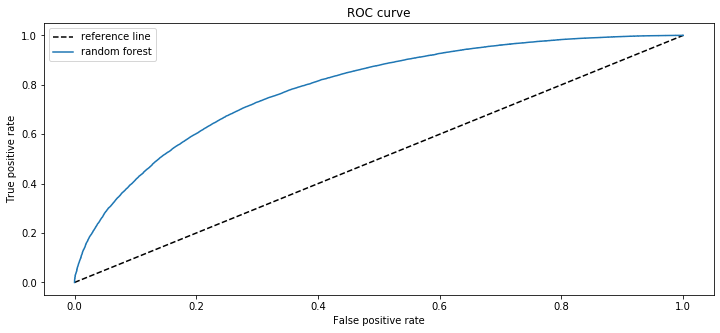

In [165]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test_PCA, y_test, X_train_PCA, y_train)

Confusion matrix without normalization
[[23896  9801]
 [ 9459 24238]]
Confusion matrix with norrmalization
[[0.70914325 0.29085675]
 [0.28070748 0.71929252]]


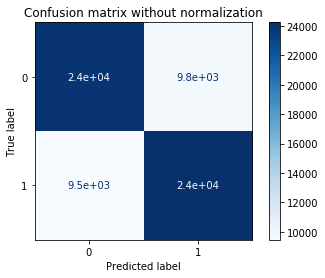

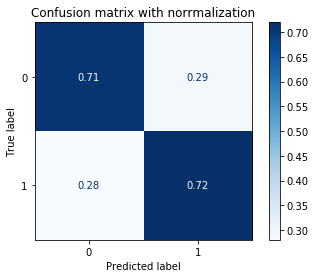

In [166]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test_PCA, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

Although variations of different features is low, but if number of components is less than maximum model will result in lower F1 score. In order to get maximum accuracy of a model, maximum numbet of components need to be included.

### Gradient Boosted Decision Tree

In [40]:
param_grid = {'n_estimators' : [70] ,'max_depth':[3],'learning_rate':[0.2]}
n_folds = 2
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=n_folds,return_train_score=True, n_jobs =4)

In [41]:
grid_search.fit(X_train_PCA, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [42]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 70}
Best cross-validation score: 0.71


In [43]:
print("Test set score: {:.2f}".format(grid_search.score(X_test_PCA, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train_PCA, y_train)))

Test set score: 0.71
Train set score: 0.71


In [44]:
best_param_model = grid_search.best_estimator_
best_param_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Build the model

In [45]:
model = best_param_model.fit(X_train_PCA, y_train)

In [46]:
#Predict values
y_test_predict = model.predict(X_test_PCA)
y_train_predict = model.predict(X_train_PCA)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.71      0.69      0.70     33697
     class 1       0.70      0.72      0.71     33697

    accuracy                           0.71     67394
   macro avg       0.71      0.71      0.71     67394
weighted avg       0.71      0.71      0.71     67394

================Confusion matrix================
[[23350 10347]
 [ 9495 24202]]
================F1 score================
0.7055350372999285
================Recall================
0.7055820992966733
================Precision================
0.7057136095875549
================Accuracy================
0.7055820992966733
/nTrain dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.72      0.70      0.71     78626
     class 1       0.71      0.73      0.72     78626

    accuracy                           0.71    157252

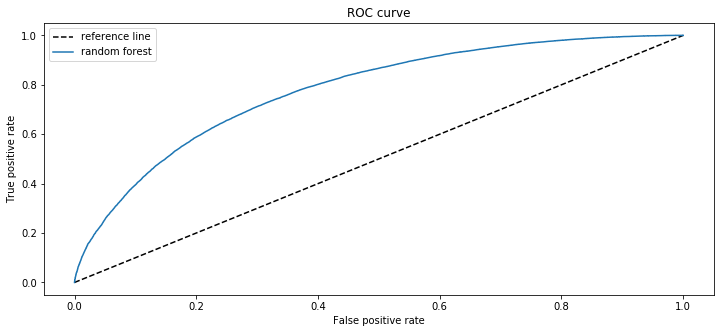

In [47]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test_PCA, y_test, X_train_PCA, y_train)

Confusion matrix without normalization
[[22456 11241]
 [ 9929 23768]]
Confusion matrix with norrmalization
[[0.66640947 0.33359053]
 [0.29465531 0.70534469]]


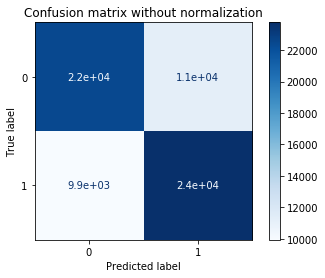

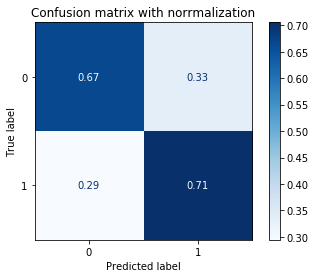

In [67]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test_PCA, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

Since models with maximum number of PCA components are same as models with just undersampling, for Gradient Boosted Decision Tree, max_depth is lowered which removed the overfitting as it was suspected in previous segment.

## Models with oversampling SMOTE

In [27]:
data_over = data_encoded.copy()

In [49]:
# # Data standardization
# for col in data_stand.columns:
#     if col=='target' or col=='id':
#         continue
#     else:
#         data_stand[col]= StandardScaler().fit_transform(data_stand[col][:,np.newaxis]);

In [28]:
# Lets shuffle the data before creating the subsamples
data_over= data_over.sample(frac=1)

X = data_over.drop(['id','target'], axis= 1)
y= data_over['target']

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(n_jobs=4)
X_sm, y_sm = smote.fit_sample(X, y)

/home/jelena/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/jelena/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/jelena/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.2

In [30]:
print('\nBefore OVER-sampling\n', y.value_counts())
y_sm_s = pd.Series(y_sm)
print('\nAfter OVER-resampling\n', y_sm_s.value_counts())


Before OVER-sampling
 0    487677
1    112323
Name: target, dtype: int64

After OVER-resampling
 1    487677
0    487677
dtype: int64


In [31]:
X_sm.shape

(975354, 87)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm_s, test_size = 0.3, random_state = 0, stratify = y_sm_s)

### Logistic Regression

In [70]:
params_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 50, 100]}
n_folds = 5
f1_macro_score = make_scorer(f1_score, average='macro')
grid_search = GridSearchCV(LogisticRegression(random_state=0, solver='sag', max_iter=100000), params_grid, cv=n_folds, return_train_score=True, scoring=f1_macro_score, n_jobs=-2)

In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='sag',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(f1_score, average=macro), verbose=0)

In [67]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.73


In [68]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test set score: 0.73
Train set score: 0.73


In [37]:
best_param_model = grid_search.best_estimator_
best_param_model

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
model = best_param_model.fit(X_train, y_train)

In [39]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.74      0.72      0.73    146304
     class 1       0.73      0.75      0.74    146303

    accuracy                           0.73    292607
   macro avg       0.73      0.73      0.73    292607
weighted avg       0.73      0.73      0.73    292607

================Confusion matrix================
[[105376  40928]
 [ 36884 109419]]
================F1 score================
0.7340225686791948
================Recall================
0.7340733947570512
================Precision================
0.7342523273151929
================Accuracy================
0.7340733475275711

Train dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.74      0.72      0.73    341373
     class 1       0.73      0.75      0.74    341374

    accuracy                           0.73    682

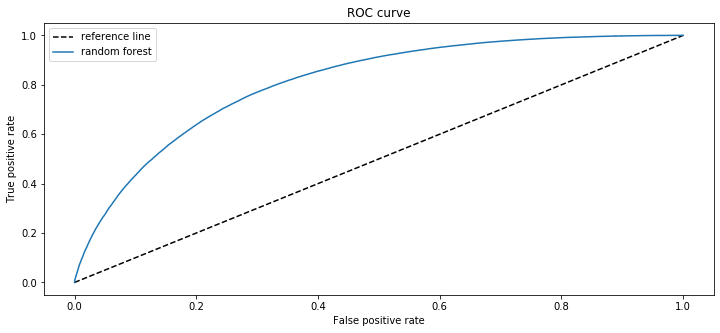

In [40]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('\nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

Confusion matrix without normalization
[[105376  40928]
 [ 36884 109419]]
Confusion matrix with norrmalization
[[0.72025372 0.27974628]
 [0.25210693 0.74789307]]


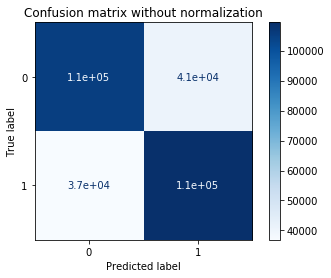

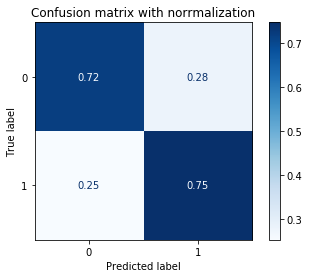

In [41]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

With oversampling, Logistic Regression model gave higher accurancy comparing to previous variations and models.

### Gradient Boosted Decision Tree

In [42]:
#GridSearch and CV
param_grid = {'n_estimators' : [70] ,'max_depth':[3],'learning_rate':[0.2]}
n_folds = 5
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=n_folds,return_train_score=True, n_jobs =-2)

In [43]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [44]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 70}
Best cross-validation score: 0.89


In [45]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))

Test set score: 0.89
Train set score: 0.89


In [46]:
best_param_model = grid_search.best_estimator_
best_param_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### Build the model

In [47]:
model = best_param_model.fit(X_train, y_train)

In [48]:
#Predict values
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

Test dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.84      0.96      0.89    146304
     class 1       0.95      0.81      0.88    146303

    accuracy                           0.89    292607
   macro avg       0.90      0.89      0.89    292607
weighted avg       0.90      0.89      0.89    292607

================Confusion matrix================
[[140420   5884]
 [ 27199 119104]]
================F1 score================
0.8863338699545695
================Recall================
0.886936837308972
================Precision================
0.8953283365959908
================Accuracy================
0.8869370862624613
/nTrain dataset
================Classification report================
              precision    recall  f1-score   support

     class 0       0.84      0.96      0.89    341373
     class 1       0.95      0.81      0.88    341374

    accuracy                           0.89    682

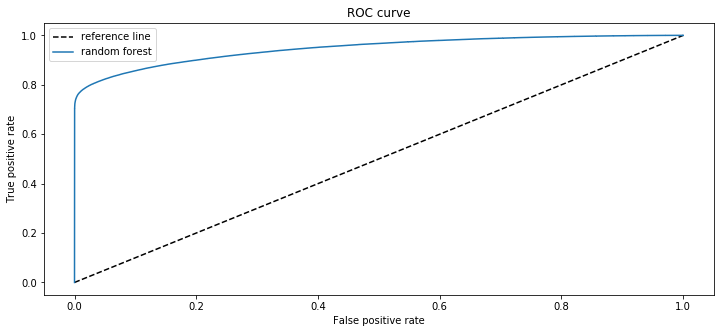

In [49]:
#Measure model accuracy
print('Test dataset')
model_evaluation(y_test, y_test_predict)

print('/nTrain dataset')
model_evaluation(y_train, y_train_predict)

print('\nAUC_ROC')
auc_roc(model, X_test, y_test, X_train, y_train)

Confusion matrix without normalization
[[140420   5884]
 [ 27199 119104]]
Confusion matrix with norrmalization
[[0.95978237 0.04021763]
 [0.1859087  0.8140913 ]]


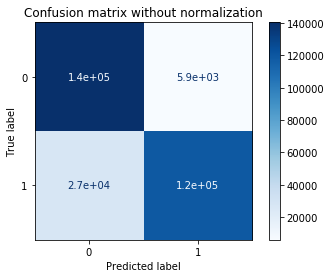

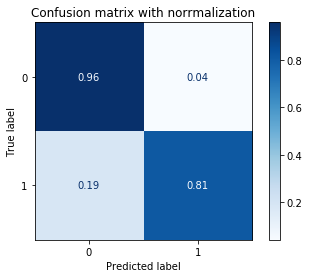

In [50]:
# Plot confusion matrix
plot_options = [('Confusion matrix without normalization', None), ('Confusion matrix with norrmalization', 'true')]
for title, norm_option in plot_options:
    _ = disp = plot_confusion_matrix(model, X_test, y_test, display_labels=[0,1],cmap=plt.cm.Blues, normalize=norm_option)
    _ = disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

Using same hypertuning parameters as in prevous gradient boosted decision tree with oversampling achieved accuracy is 0.89 for both train and test dataset. F1 score for class 0 and class 1 is almost the same (0.88, 0.89). 

## Conclusion



Looking at the data and testing and trying different approaches, it could be concluded:
1. Every feature contributes with variance that is important for training of the model. Features that have similar counts of categories like F_T and countries and animals have positive impact on model accuracy. PCA analysis shows small differences in variance, especially after 40 components but if less that maximum number of components is used for modeling accuracy of a model will be lower.
2. In order to get models with high accuracy, data needs to be balanced with oversampling using SMOTE techique. Random oversampling won't give the same results.